# 억양 및 음성학적 특징 추출 베이스라인

In [ ]:
!pip install praat-parselmouth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 27.1 MB/s eta 0:00:00


In [ ]:
# pitch 데이터 추출 및 시각화
import parselmouth
from parselmouth.praat import call
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 문미억양 pitch slope 추출
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# pitch 보간에서 필요
from scipy import interpolate 

In [ ]:
audio_file = "/content/drive/MyDrive/aiffel/aiffelthon/5e2ac3d55807b852d9e01fd6.wav"

## 1. pitch 데이터 추출 및 시각화

- 필요한 라이브러리:

  parselmouth: 음성 파일에서 pitch 데이터를 추출합니다.
  matplotlib: 추출된 pitch 데이터를 시각화합니다.
  numpy: Voiceless 구간을 NaN으로 처리합니다.
- 함수:

  extract_pitch_contour: 음성 파일에서 pitch 데이터를 추출하고, 시간 배열(times)과 주파수 배열(pitch_values)을 반환합니다.
  visualize_pitch_contour: 추출된 pitch 데이터를 시간에 따라 시각화합니다.
- Pitch 범위 설정:

  to_pitch()에서 75Hz~500Hz의 범위를 사용해 인간 음성의 일반적인 pitch를 추출합니다.
- Voiceless 구간 처리:

  Voiceless (무성음) 구간은 0으로 표시되며, 이를 NaN으로 변환해 그래프에서 표시하지 않습니다.

In [ ]:
# 음성 파일에서 Pitch를 추출하는 함수
def extract_pitch_contour(audio_path):
    try:
        # 음성 파일 읽기
        sound = parselmouth.Sound(audio_path)

        # Pitch 추출 (범위: 75Hz ~ 500Hz)
        pitch = sound.to_pitch()
        pitch_values = pitch.selected_array['frequency']
        pitch_values[pitch_values == 0] = np.nan  # Voiceless 구간 제거
        times = pitch.xs()

        return times, pitch_values
    except Exception as e:
        print(f"Error processing file {audio_path}: {e}")
        return None, None

# Pitch contour를 시각화하는 함수
def visualize_pitch_contour(times, pitch_values):
    plt.figure(figsize=(10, 6))
    plt.plot(times, pitch_values, label="Pitch contour", color="blue")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Pitch Contour")
    plt.legend()
    plt.grid()
    plt.show()




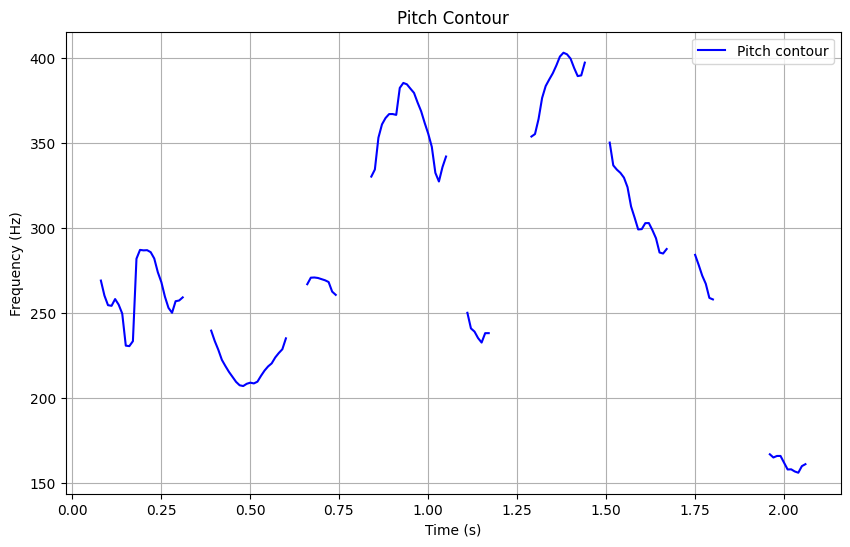

In [ ]:
# 사용 예시
if __name__ == "__main__":
    # audio_file = "/content/sample_data/5e2ac3d55807b852d9e01fd6.wav"  # 분석할 음성 파일 경로를 입력하세요.

    # Pitch 추출 및 시각화
    times, pitch_values = extract_pitch_contour(audio_file)
    if times is not None and pitch_values is not None:
        visualize_pitch_contour(times, pitch_values)

### pitch 구간 재설정 (150~450 Hz)
- pitch_floor=150은 피치의 최저 주파수를 150Hz로 설정하고, pitch_ceiling=450은 최대 주파수를 450Hz로 설정

In [ ]:
def extract_pitch_contour(audio_path):
    try:
        # 음성 파일 읽기
        sound = parselmouth.Sound(audio_path)

        # Pitch 추출 (범위: 150Hz ~ 450Hz)
        pitch = sound.to_pitch(pitch_floor=150, pitch_ceiling=450)
        pitch_values = pitch.selected_array['frequency']
        pitch_values[pitch_values == 0] = np.nan  # Voiceless 구간 제거
        times = pitch.xs()

        return times, pitch_values
    except Exception as e:
        print(f"Error processing file {audio_path}: {e}")
        return None, None


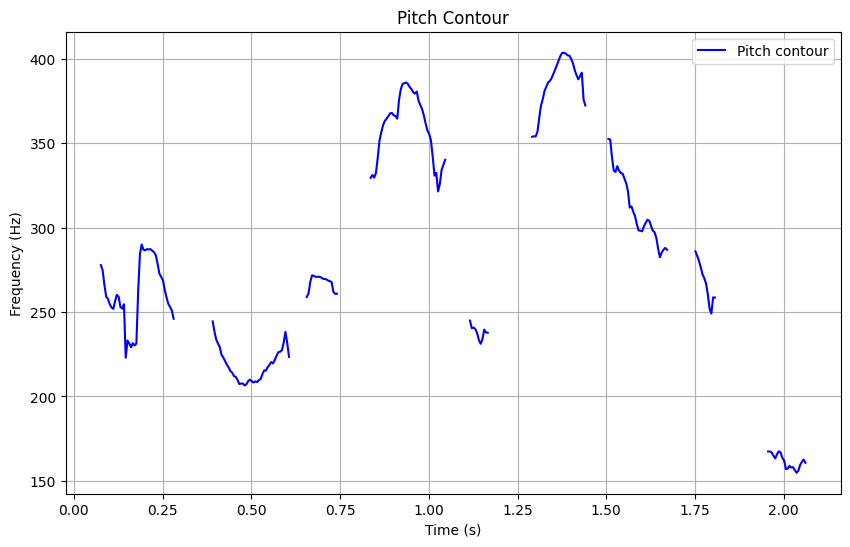

In [ ]:
# 사용 예시
if __name__ == "__main__":
    # audio_file = "/content/sample_data/5e2ac3d55807b852d9e01fd6.wav"  # 분석할 음성 파일 경로를 입력하세요.

    # Pitch 추출 및 시각화
    times, pitch_values = extract_pitch_contour(audio_file)
    if times is not None and pitch_values is not None:
        visualize_pitch_contour(times, pitch_values)

### 노이즈 제거 후 결과

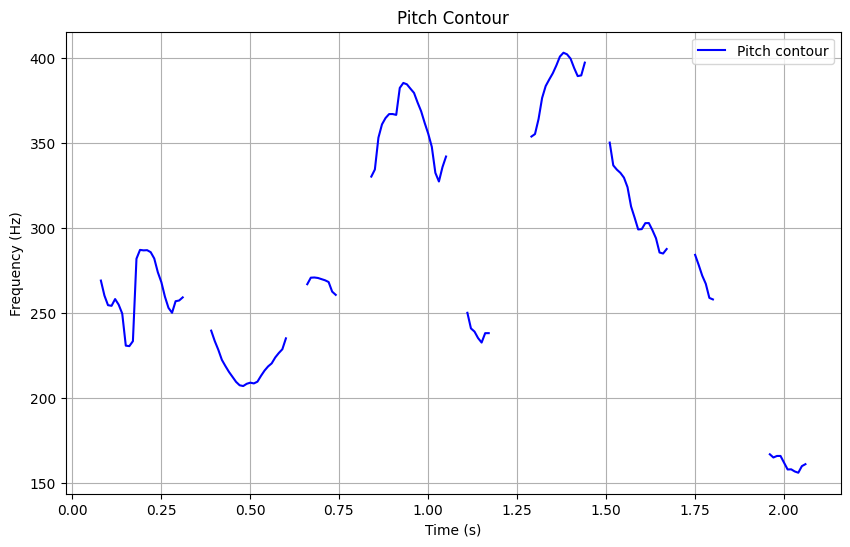

In [ ]:
# 사용 예시
if __name__ == "__main__":
    # audio_file = "/content/sample_data/cleanSound.wav"  # 분석할 음성 파일 경로를 입력하세요.

    # Pitch 추출 및 시각화
    times, pitch_values = extract_pitch_contour(audio_file)
    if times is not None and pitch_values is not None:
        visualize_pitch_contour(times, pitch_values)

### Voiceless 구간 제거하지 않으면?

In [ ]:
def extract_pitch_contour(audio_path):
    try:
        # 음성 파일 읽기
        sound = parselmouth.Sound(audio_path)

        # Pitch 추출 (범위: 150Hz ~ 450Hz)
        pitch = sound.to_pitch(pitch_floor=150, pitch_ceiling=450)
        pitch_values = pitch.selected_array['frequency']
        # pitch_values[pitch_values == 0] = np.nan  # Voiceless 구간 제거
        times = pitch.xs()

        return times, pitch_values
    except Exception as e:
        print(f"Error processing file {audio_path}: {e}")
        return None, None


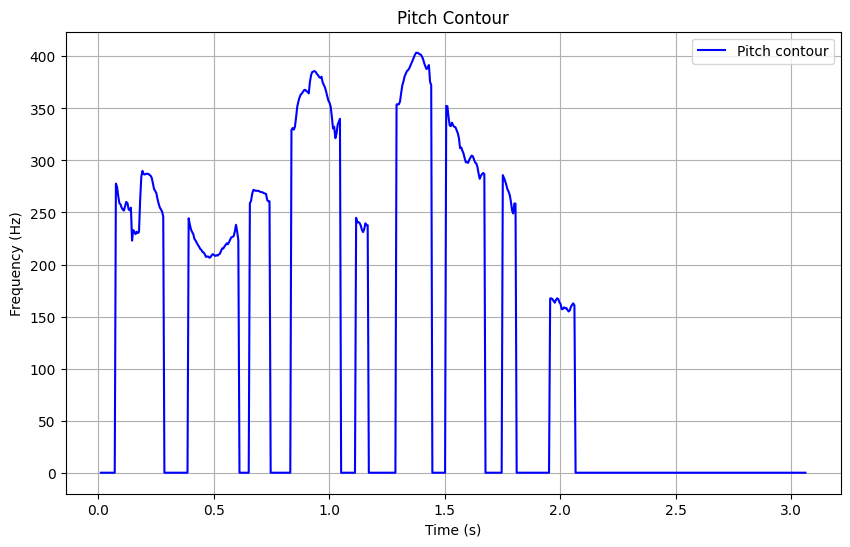

In [ ]:
# 사용 예시
if __name__ == "__main__":
    # audio_file = "/content/sample_data/5e2ac3d55807b852d9e01fd6.wav"  # 분석할 음성 파일 경로를 입력하세요.

    # Pitch 추출 및 시각화
    times, pitch_values = extract_pitch_contour(audio_file)
    if times is not None and pitch_values is not None:
        visualize_pitch_contour(times, pitch_values)

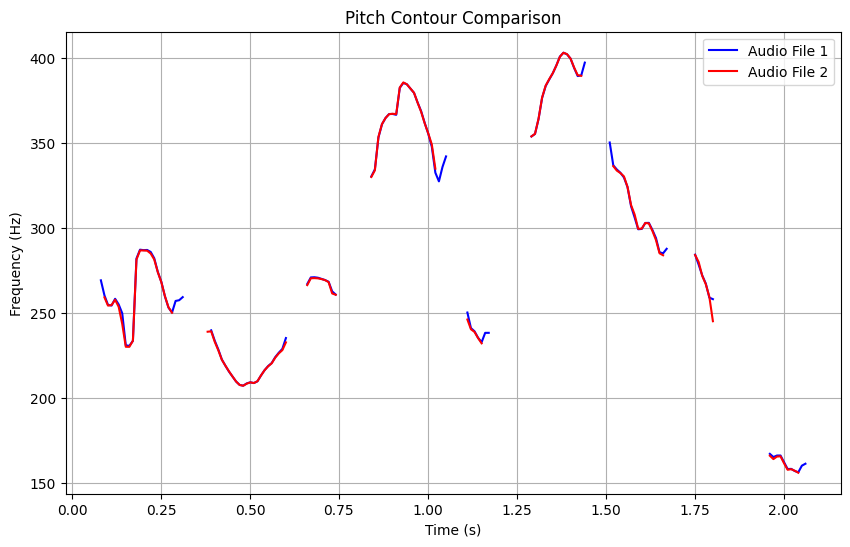

In [ ]:
# prompt: 두 그래프의 pitch contour를 겹쳐서 어떤 차이가 있는지 비교하는 코드

def extract_pitch_contour(audio_path, pitch_floor=75, pitch_ceiling=500):
    try:
        sound = parselmouth.Sound(audio_path)
        pitch = sound.to_pitch(pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
        pitch_values = pitch.selected_array['frequency']
        pitch_values[pitch_values == 0] = np.nan
        times = pitch.xs()
        return times, pitch_values
    except Exception as e:
        print(f"Error processing file {audio_path}: {e}")
        return None, None

def visualize_pitch_contours(times1, pitch_values1, times2, pitch_values2, label1, label2):
    plt.figure(figsize=(10, 6))
    plt.plot(times1, pitch_values1, label=label1, color="blue")
    plt.plot(times2, pitch_values2, label=label2, color="red")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Pitch Contour Comparison")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage with two audio files
audio_file1 = "/content/sample_data/5e2ac3d55807b852d9e01fd6.wav"
audio_file2 = "/content/sample_data/cleanSound.wav" # Replace with the path to your second audio file

times1, pitch_values1 = extract_pitch_contour(audio_file1)
times2, pitch_values2 = extract_pitch_contour(audio_file2)

if times1 is not None and pitch_values1 is not None and times2 is not None and pitch_values2 is not None:
    visualize_pitch_contours(times1, pitch_values1, times2, pitch_values2, "Audio File 1", "Audio File 2")
else:
    print("Failed to extract pitch contours from one or both files.")

### pitch 해상도 조정
- 기존 time_step=0.01

In [ ]:
def extract_pitch_contour(audio_path, time_step=0.00005):
    try:
        # 음성 파일 읽기
        sound = parselmouth.Sound(audio_path)

        # Pitch 추출 (범위: 150Hz ~ 450Hz, time_step 설정)
        pitch = sound.to_pitch(pitch_floor=150, pitch_ceiling=450, time_step=time_step)
        pitch_values = pitch.selected_array['frequency']
        pitch_values[pitch_values == 0] = np.nan  # Voiceless 구간 제거
        times = pitch.xs()

        return times, pitch_values
    except Exception as e:
        print(f"Error processing file {audio_path}: {e}")
        return None, None


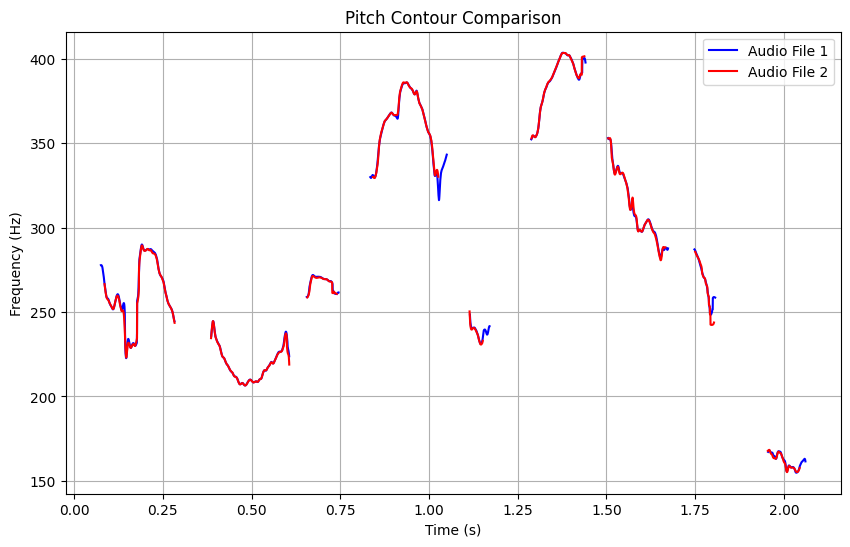

In [ ]:

def visualize_pitch_contours(times1, pitch_values1, times2, pitch_values2, label1, label2):
    plt.figure(figsize=(10, 6))
    plt.plot(times1, pitch_values1, label=label1, color="blue")
    plt.plot(times2, pitch_values2, label=label2, color="red")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Pitch Contour Comparison")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage with two audio files
audio_file1 = "/content/sample_data/5e2ac3d55807b852d9e01fd6.wav"
audio_file2 = "/content/sample_data/cleanSound.wav" # Replace with the path to your second audio file

times1, pitch_values1 = extract_pitch_contour(audio_file1)
times2, pitch_values2 = extract_pitch_contour(audio_file2)

if times1 is not None and pitch_values1 is not None and times2 is not None and pitch_values2 is not None:
    visualize_pitch_contours(times1, pitch_values1, times2, pitch_values2, "Audio File 1", "Audio File 2")
else:
    print("Failed to extract pitch contours from one or both files.")

## 2. boundary tone 구간 내 pitch 기울기 계산 및 시각화

In [ ]:
# Boundary Tone 구간의 기울기 추출
def calculate_slope(times, pitch_values, start_time, end_time):
    # Boundary Tone 구간 선택
    mask = (times >= start_time) & (times <= end_time)
    selected_times = times[mask]
    selected_pitches = pitch_values[mask]

    # NaN 제거 (무성구간 제외)
    valid_indices = ~np.isnan(selected_pitches)
    selected_times = selected_times[valid_indices]
    selected_pitches = selected_pitches[valid_indices]

    if len(selected_times) < 2:
        raise ValueError("Insufficient data points in the selected boundary tone region.")

    # 선형 회귀를 사용해 기울기 계산
    reg = LinearRegression()
    reg.fit(selected_times.reshape(-1, 1), selected_pitches)
    slope = reg.coef_[0]

    return slope, selected_times, selected_pitches

# 데이터 시각화
def visualize_boundary_tone(times, pitch_values, selected_times, selected_pitches, slope):
    plt.figure(figsize=(10, 6))
    plt.plot(times, pitch_values, label="Pitch Contour", color="blue")
    plt.scatter(selected_times, selected_pitches, color="red", label="Boundary Tone Region")
    plt.plot(selected_times, slope * selected_times + selected_pitches[0], color="green", label="Slope Line")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Pitch Contour with Boundary Tone Slope")
    plt.legend()
    plt.grid()
    plt.show()


Slope of Boundary Tone: 398.1490


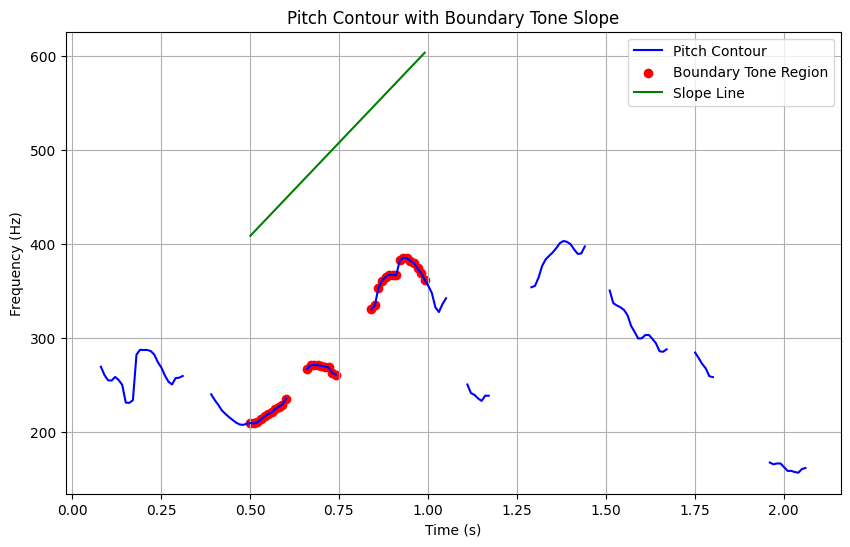

In [ ]:
# 사용 예시
if __name__ == "__main__":
    # audio_file = "your_audio_file.wav"  # 분석할 음성 파일 경로를 입력하세요.
    times, pitch_values = extract_pitch_contour(audio_file)

    # Boundary Tone 시작 및 끝 시간 (초 단위로 지정)
    start_time = 0.5  # Boundary Tone 시작 시간
    end_time = 1.0    # Boundary Tone 끝 시간

    try:
        slope, selected_times, selected_pitches = calculate_slope(times, pitch_values, start_time, end_time)
        print(f"Slope of Boundary Tone: {slope:.4f}")
        visualize_boundary_tone(times, pitch_values, selected_times, selected_pitches, slope)
    except ValueError as e:
        print(e)


### boundary tone 구간 수정

In [ ]:
# Boundary Tone 구간의 기울기 추출
def calculate_slope(times, pitch_values):
    # Boundary Tone 구간 자동 지정 (문장 내 마지막 음절 구간)
    end_time = times[-1]  # 문장 끝 시간
    start_time = end_time - 0.2  # 마지막 0.2초를 Boundary Tone 구간으로 가정

    # Boundary Tone 구간 선택
    mask = (times >= start_time) & (times <= end_time)
    selected_times = times[mask]
    selected_pitches = pitch_values[mask]

    # NaN 제거 (무성구간 제외)
    valid_indices = ~np.isnan(selected_pitches)
    selected_times = selected_times[valid_indices]
    selected_pitches = selected_pitches[valid_indices]

    if len(selected_times) < 2:
        raise ValueError("Insufficient data points in the selected boundary tone region.")

    # 선형 회귀를 사용해 기울기 계산
    reg = LinearRegression()
    reg.fit(selected_times.reshape(-1, 1), selected_pitches)
    slope = reg.coef_[0]

    return slope, selected_times, selected_pitches

# 데이터 시각화
def visualize_boundary_tone(times, pitch_values, selected_times, selected_pitches, slope):
    plt.figure(figsize=(10, 6))
    plt.plot(times, pitch_values, label="Pitch Contour", color="blue")
    plt.scatter(selected_times, selected_pitches, color="red", label="Boundary Tone Region")
    plt.plot(selected_times, slope * selected_times + selected_pitches[0], color="green", label="Slope Line")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Pitch Contour with Boundary Tone Slope")
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
# 사용 예시
if __name__ == "__main__":
    # audio_file = "your_audio_file.wav"  # 분석할 음성 파일 경로를 입력하세요.
    times, pitch_values = extract_pitch_contour(audio_file)

    try:
        slope, selected_times, selected_pitches = calculate_slope(times, pitch_values)
        print(f"Slope of Boundary Tone: {slope:.4f}")
        visualize_boundary_tone(times, pitch_values, selected_times, selected_pitches, slope)
    except ValueError as e:
        print(e)


Insufficient data points in the selected boundary tone region.


### 예외적인 경우 (충분하지 않은 데이터 포인트 등) 를 위한 코드 수정

In [ ]:
# Boundary Tone 구간의 기울기 추출
def calculate_slope(times, pitch_values):
    # Boundary Tone 구간 자동 지정 (문장 내 마지막 음절 구간)
    end_time = times[-1]  # 문장 끝 시간
    start_time = max(times[0], end_time - 0.5)  # 최대 0.5초로 boundary tone 구간 확장

    # Boundary Tone 구간 선택
    mask = (times >= start_time) & (times <= end_time)
    selected_times = times[mask]
    selected_pitches = pitch_values[mask]

    # NaN 제거 (무성구간 제외)
    valid_indices = ~np.isnan(selected_pitches)
    selected_times = selected_times[valid_indices]
    selected_pitches = selected_pitches[valid_indices]

    if len(selected_times) < 2:
        raise ValueError("Insufficient data points in the selected boundary tone region. Try increasing the time range or ensure the audio contains sufficient pitch data.")

    # 선형 회귀를 사용해 기울기 계산
    reg = LinearRegression()
    reg.fit(selected_times.reshape(-1, 1), selected_pitches)
    slope = reg.coef_[0]

    return slope, selected_times, selected_pitches

# 데이터 시각화
def visualize_boundary_tone(times, pitch_values, selected_times, selected_pitches, slope):
    plt.figure(figsize=(10, 6))
    plt.plot(times, pitch_values, label="Pitch Contour", color="blue")
    plt.scatter(selected_times, selected_pitches, color="red", label="Boundary Tone Region")
    plt.plot(selected_times, slope * selected_times + selected_pitches[0], color="green", label="Slope Line")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Pitch Contour with Boundary Tone Slope")
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
if __name__ == "__main__":
    # audio_file = "your_audio_file.wav"  # 분석할 음성 파일 경로를 입력하세요.
    times, pitch_values = extract_pitch_contour(audio_file)

    try:
        slope, selected_times, selected_pitches = calculate_slope(times, pitch_values)
        print(f"Slope of Boundary Tone: {slope:.4f}")
        visualize_boundary_tone(times, pitch_values, selected_times, selected_pitches, slope)
    except ValueError as e:
        print(e)

Insufficient data points in the selected boundary tone region. Try increasing the time range or ensure the audio contains sufficient pitch data.


### 에러 해결 : NaN 값을 보간 (Interpolation)으로 처리하기
- 그래프에서 Pitch 라인이 중간중간 끊기는 문제는 음성 데이터에서 Voiceless 구간이 포함되어 있기 때문에 발생할 수 있음
- 이러한 구간에서 Pitch 값이 0으로 설정되거나 결측값(NaN)으로 처리됨

In [ ]:
def interpolate_pitch(pitch_values):
    # NaN 값이 있는 위치 찾기
    nan_indices = np.isnan(pitch_values)

    # NaN 값이 아닌 위치의 값만 추출
    valid_indices = ~nan_indices
    valid_pitches = pitch_values[valid_indices]
    valid_times = np.array(range(len(pitch_values)))[valid_indices]

    # 보간 함수 생성 (1차원 보간)
    interp_func = interpolate.interp1d(valid_times, valid_pitches, kind='linear', fill_value='extrapolate')

    # NaN 값을 보간하여 채운 pitch 값 반환
    interpolated_pitch_values = interp_func(np.arange(len(pitch_values)))
    return interpolated_pitch_values


In [ ]:
# Pitch 값 보간 함수
def interpolate_pitch(pitch_values):
    # NaN 값이 있는 위치 찾기
    nan_indices = np.isnan(pitch_values)

    # NaN 값이 아닌 위치의 값만 추출
    valid_indices = ~nan_indices
    valid_pitches = pitch_values[valid_indices]
    valid_times = np.array(range(len(pitch_values)))[valid_indices]

    # 보간 함수 생성 (1차원 보간)
    interp_func = interpolate.interp1d(valid_times, valid_pitches, kind='linear', fill_value='extrapolate')

    # NaN 값을 보간하여 채운 pitch 값 반환
    interpolated_pitch_values = interp_func(np.arange(len(pitch_values)))
    return interpolated_pitch_values

# 음성 파일에서 Pitch를 추출하는 함수 수정
def extract_pitch_contour(audio_path):
    try:
        # 음성 파일 읽기
        sound = parselmouth.Sound(audio_path)

        # Pitch 추출 (범위: 75Hz ~ 500Hz)
        pitch = sound.to_pitch()
        pitch_values = pitch.selected_array['frequency']
        pitch_values[pitch_values == 0] = np.nan  # Voiceless 구간 제거
        times = pitch.xs()

        # Pitch 값 보간
        pitch_values = interpolate_pitch(pitch_values)

        return times, pitch_values
    except Exception as e:
        print(f"Error processing file {audio_path}: {e}")
        return None, None


Slope of Boundary Tone: 115.5447


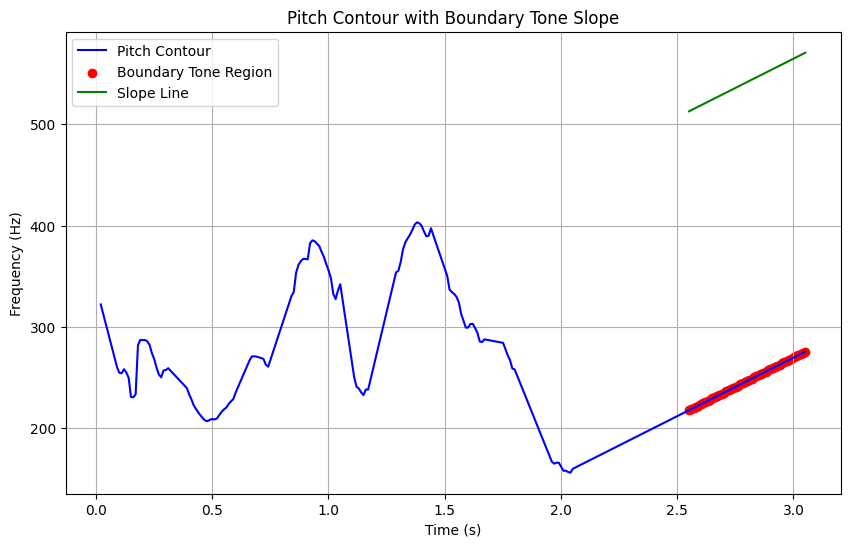

In [ ]:
if __name__ == "__main__":
    # audio_file = "your_audio_file.wav"  # 분석할 음성 파일 경로를 입력하세요.
    times, pitch_values = extract_pitch_contour(audio_file)

    try:
        slope, selected_times, selected_pitches = calculate_slope(times, pitch_values)
        print(f"Slope of Boundary Tone: {slope:.4f}")
        visualize_boundary_tone(times, pitch_values, selected_times, selected_pitches, slope)
    except ValueError as e:
        print(e)

### 시각화를 조금 다르게

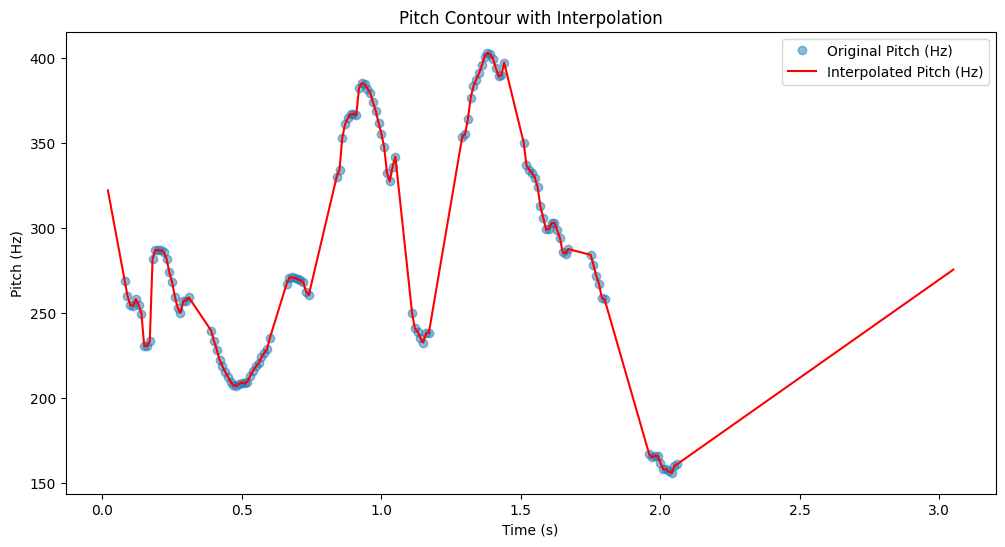

In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def extract_and_interpolate_pitch(sound_path, time_step=0.01, pitch_floor=75, pitch_ceiling=600):
    # 1. Load sound
    sound = parselmouth.Sound(sound_path)

    # 2. Extract pitch
    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']  # Extract pitch values (Hz)
    pitch_times = pitch.xs()  # Extract corresponding time values

    # Replace unvoiced/unmeasured parts (0 Hz) with NaN
    pitch_values[pitch_values == 0] = np.nan

    # 3. Interpolate gaps
    valid_idx = ~np.isnan(pitch_values)  # Indices where pitch is valid
    interp_function = interp1d(pitch_times[valid_idx], pitch_values[valid_idx], kind='linear', bounds_error=False, fill_value="extrapolate")
    interpolated_pitch = interp_function(pitch_times)

    # 4. Plot original and interpolated pitch
    plt.figure(figsize=(12, 6))
    plt.plot(pitch_times, pitch_values, 'o', label='Original Pitch (Hz)', alpha=0.5)
    plt.plot(pitch_times, interpolated_pitch, '-', label='Interpolated Pitch (Hz)', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.legend()
    plt.title('Pitch Contour with Interpolation')
    plt.show()

    return pitch_times, interpolated_pitch

# Example usage
sound_file = audio_file  # Replace with your file path
pitch_times, interpolated_pitch = extract_and_interpolate_pitch(sound_file)


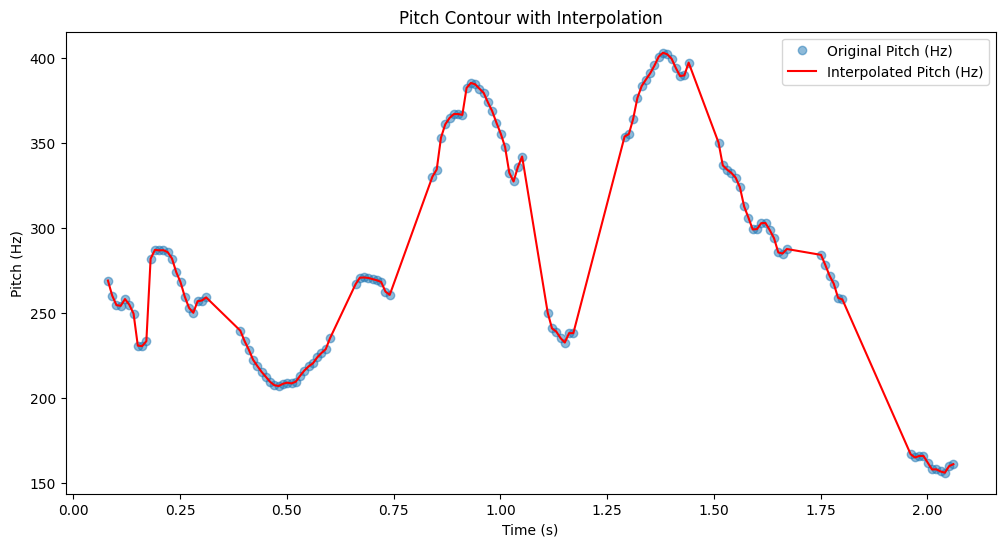

In [ ]:
# lastly valid pitch 이후 보간 이루어지지 않도록 수정

import parselmouth
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def extract_and_interpolate_pitch(sound_path, time_step=0.01, pitch_floor=75, pitch_ceiling=600):
    # 1. Load sound
    sound = parselmouth.Sound(sound_path)

    # 2. Extract pitch
    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']  # Extract pitch values (Hz)
    pitch_times = pitch.xs()  # Extract corresponding time values

    # Replace unvoiced/unmeasured parts (0 Hz) with NaN
    pitch_values[pitch_values == 0] = np.nan

    # 3. Limit interpolation to valid range
    valid_idx = ~np.isnan(pitch_values)  # Indices where pitch is valid
    last_valid_time = pitch_times[valid_idx][-1]  # Last valid pitch time
    interp_function = interp1d(
        pitch_times[valid_idx],
        pitch_values[valid_idx],
        kind='linear',
        bounds_error=False,
        fill_value=(np.nan, np.nan)  # Ensure no extrapolation beyond valid range
    )

    interpolated_pitch = interp_function(pitch_times)

    # Mask times beyond the last valid time
    interpolated_pitch[pitch_times > last_valid_time] = np.nan

    # 4. Plot original and interpolated pitch
    plt.figure(figsize=(12, 6))
    plt.plot(pitch_times, pitch_values, 'o', label='Original Pitch (Hz)', alpha=0.5)
    plt.plot(pitch_times, interpolated_pitch, '-', label='Interpolated Pitch (Hz)', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.legend()
    plt.title('Pitch Contour with Interpolation')
    plt.show()

    return pitch_times, interpolated_pitch

# Example usage
sound_file = audio_file  # Replace with your file path
pitch_times, interpolated_pitch = extract_and_interpolate_pitch(sound_file)


### 마지막 어절에서의 pitch
- ex. "- 사고쳤어."

In [ ]:
# 보간 과정을 포함

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import parselmouth
from scipy import interpolate

# Pitch 값 보간 함수
def interpolate_pitch(pitch_values):
    # NaN 값이 있는 위치 찾기
    nan_indices = np.isnan(pitch_values)

    # NaN 값이 아닌 위치의 값만 추출
    valid_indices = ~nan_indices
    valid_pitches = pitch_values[valid_indices]
    valid_times = np.array(range(len(pitch_values)))[valid_indices]

    # 보간 함수 생성 (1차원 보간)
    interp_func = interpolate.interp1d(valid_times, valid_pitches, kind='linear', fill_value='extrapolate')

    # NaN 값을 보간하여 채운 pitch 값 반환
    interpolated_pitch_values = interp_func(np.arange(len(pitch_values)))
    return interpolated_pitch_values

# 마지막 어절 구간의 기울기 추출
def calculate_slope(times, pitch_values):
    # 마지막 어절 구간
    end_time = times[-1]  # 문장 끝 시간
    start_time = end_time - 0.65  # 마지막 0.65 하드코딩

    # 구간 선택
    mask = (times >= start_time) & (times <= end_time)
    selected_times = times[mask]
    selected_pitches = pitch_values[mask]

    # NaN 제거 (무성구간 제외)
    valid_indices = ~np.isnan(selected_pitches)
    selected_times = selected_times[valid_indices]
    selected_pitches = selected_pitches[valid_indices]

    if len(selected_times) < 2:
        raise ValueError("Insufficient data points in the selected boundary tone region.")

    # 선형 회귀를 사용해 기울기 계산
    reg = LinearRegression()
    reg.fit(selected_times.reshape(-1, 1), selected_pitches)
    slope = reg.coef_[0]

    return slope, selected_times, selected_pitches

# 음성 파일에서 Pitch를 추출하는 함수
def extract_pitch_contour(audio_path):
    try:
        # 음성 파일 읽기
        sound = parselmouth.Sound(audio_path)

        # Pitch 추출 (범위: 75Hz ~ 500Hz)
        pitch = sound.to_pitch()
        pitch_values = pitch.selected_array['frequency']
        pitch_values[pitch_values == 0] = np.nan  # Voiceless 구간 제거
        times = pitch.xs()

        # Pitch 값 보간
        pitch_values = interpolate_pitch(pitch_values)

        return times, pitch_values
    except Exception as e:
        print(f"Error processing file {audio_path}: {e}")
        return None, None

# 데이터 시각화
def visualize_boundary_tone(times, pitch_values, selected_times, selected_pitches, slope):
    plt.figure(figsize=(10, 6))
    plt.plot(times, pitch_values, label="Pitch Contour", color="blue")
    plt.scatter(selected_times, selected_pitches, color="red", label="Boundary Tone Region")
    plt.plot(selected_times, slope * selected_times + selected_pitches[0], color="green", label="Slope Line")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Pitch Contour with Boundary Tone Slope")
    plt.legend()
    plt.grid()
    plt.show()



Slope of Boundary Tone: 115.5447


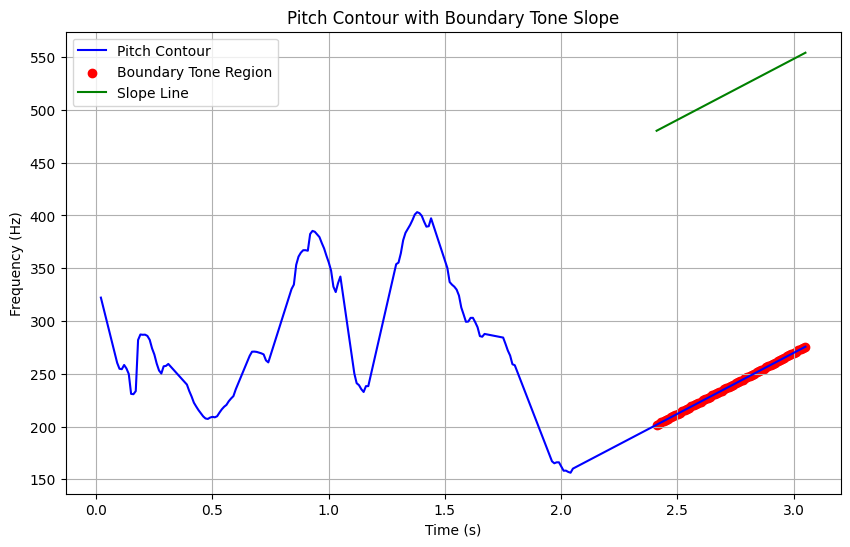

In [ ]:
# 사용 예시
if __name__ == "__main__":
    # audio_file = "your_audio_file.wav"  # 분석할 음성 파일 경로를 입력하세요.
    times, pitch_values = extract_pitch_contour(audio_file)

    try:
        slope, selected_times, selected_pitches = calculate_slope(times, pitch_values)
        print(f"Slope of Boundary Tone: {slope:.4f}")
        visualize_boundary_tone(times, pitch_values, selected_times, selected_pitches, slope)
    except ValueError as e:
        print(e)

# 3. 피치파생 특징 추출

- 한국어 문미억양 강조를 통한 향상된 음성문장 감정인식

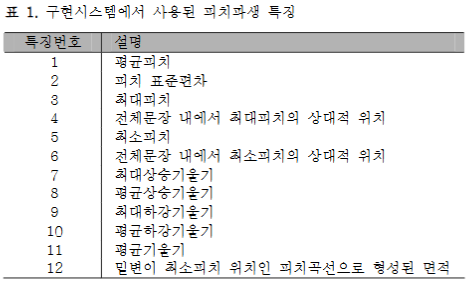


In [ ]:
def extract_pitch_contour(audio_path):
    try:
        # 음성 파일 읽기
        sound = parselmouth.Sound(audio_path)

        # Pitch 추출 (범위: 150Hz ~ 450Hz)
        pitch = sound.to_pitch(pitch_floor=150, pitch_ceiling=450)
        pitch_values = pitch.selected_array['frequency']
        pitch_values[pitch_values == 0] = np.nan  # Voiceless 구간 제거
        times = pitch.xs()

        return times, pitch_values
    except Exception as e:
        print(f"Error processing file {audio_path}: {e}")
        return None, None

def calculate_features(times, pitch_values):
    # NaN 제거
    valid_indices = ~np.isnan(pitch_values)
    valid_times = times[valid_indices]
    valid_pitches = pitch_values[valid_indices]

    if len(valid_pitches) == 0:
        raise ValueError("No valid pitch values available for feature extraction.")

    # 특징 계산
    mean_pitch = np.mean(valid_pitches)  # 1. 평균 피치
    std_pitch = np.std(valid_pitches)   # 2. 피치 표준편차
    max_pitch = np.max(valid_pitches)  # 3. 최대 피치
    min_pitch = np.min(valid_pitches)  # 5. 최소 피치

    max_pitch_time = valid_times[np.argmax(valid_pitches)]  # 4. 최대 피치의 상대적 위치
    min_pitch_time = valid_times[np.argmin(valid_pitches)]  # 6. 최소 피치의 상대적 위치

    pitch_range = max_pitch - min_pitch  # 7. 최대 상승 기울기 (단순 범위로 계산)

    avg_rise_slope = np.mean(np.diff(valid_pitches) / np.diff(valid_times))  # 8. 평균 상승 기울기
    avg_fall_slope = -np.mean(np.diff(valid_pitches) / np.diff(valid_times)) # 9. 평균 하강 기울기

    mid_pitch = (max_pitch + min_pitch) / 2  # 10. 중간값

    # 11. 평균 기울기
    slopes = np.diff(valid_pitches) / np.diff(valid_times)
    avg_slope = np.mean(slopes)

    # 12. 마지막 최소 피치 구간의 면적
    end_time = valid_times[-1]
    boundary_start_time = end_time - 0.5  # 0.5초 간격을 하드코딩
    boundary_mask = valid_times >= boundary_start_time
    boundary_times = valid_times[boundary_mask]
    boundary_pitches = valid_pitches[boundary_mask]
    boundary_area = np.trapz(boundary_pitches, boundary_times) if len(boundary_times) > 1 else 0

    return {
        "mean_pitch": mean_pitch,
        "std_pitch": std_pitch,
        "max_pitch": max_pitch,
        "max_pitch_time": max_pitch_time,
        "min_pitch": min_pitch,
        "min_pitch_time": min_pitch_time,
        "pitch_range": pitch_range,
        "avg_rise_slope": avg_rise_slope,
        "avg_fall_slope": avg_fall_slope,
        "mid_pitch": mid_pitch,
        "avg_slope": avg_slope,
        "boundary_area": boundary_area
    }

def visualize_pitch(times, pitch_values):
    plt.figure(figsize=(10, 6))
    plt.plot(times, pitch_values, label="Pitch Contour", color="blue")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Pitch Contour")
    plt.grid()
    plt.legend()
    plt.show()




mean_pitch: 283.1515056809346
std_pitch: 68.73334181315944
max_pitch: 403.48345794652477
max_pitch_time: 1.376
min_pitch: 154.87244591784165
min_pitch_time: 2.036
pitch_range: 248.61101202868312
avg_rise_slope: -100.01676134735204
avg_fall_slope: 100.01676134735204
mid_pitch: 279.1779519321832
avg_slope: -100.01676134735204
boundary_area: 119.39379064928681


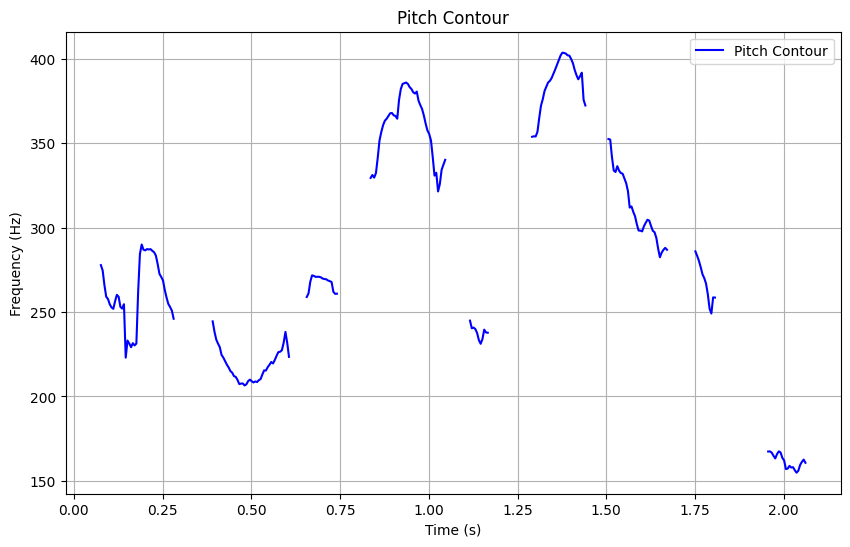

In [ ]:
# 사용 예시
if __name__ == "__main__":
    # audio_file = "your_audio_file.wav"  # 분석할 음성 파일 경로를 입력하세요.
    times, pitch_values = extract_pitch_contour(audio_file)

    if times is not None and pitch_values is not None:
        try:
            features = calculate_features(times, pitch_values)
            for feature_name, value in features.items():
                print(f"{feature_name}: {value}")

            visualize_pitch(times, pitch_values)
        except ValueError as e:
            print(e)

mean_pitch: 283.946149762495
std_pitch: 69.49073901253821
max_pitch: 403.38105958803044
max_pitch_time: 1.381
min_pitch: 155.22723847317863
min_pitch_time: 2.036
pitch_range: 248.1538211148518
avg_rise_slope: -96.5848204738656
avg_fall_slope: 96.5848204738656
mid_pitch: 279.30414903060455
avg_slope: -96.5848204738656
boundary_area: 119.60743947140737


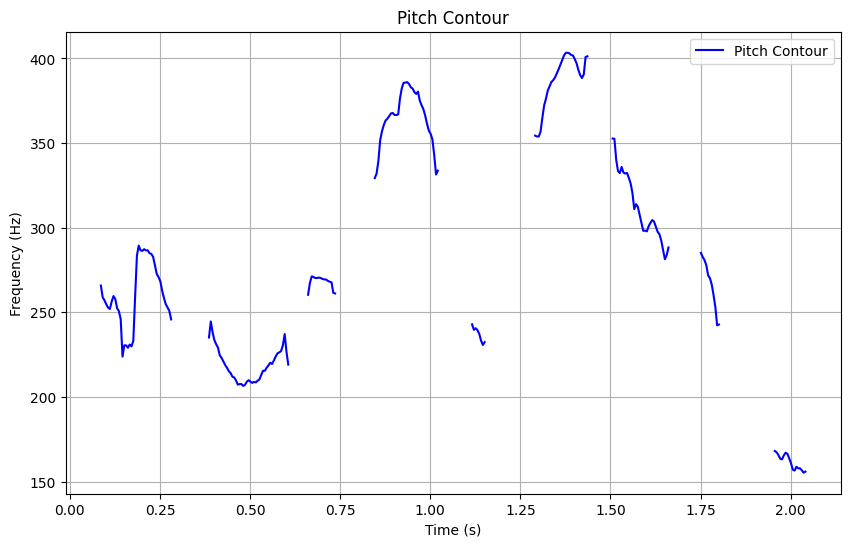

In [ ]:
# 사용 예시
if __name__ == "__main__":
    audio_file = "/content/drive/MyDrive/aiffel/aiffelthon/cleanSound.wav"  # 분석할 음성 파일 경로를 입력하세요.
    times, pitch_values = extract_pitch_contour(audio_file)

    if times is not None and pitch_values is not None:
        try:
            features = calculate_features(times, pitch_values)
            for feature_name, value in features.items():
                print(f"{feature_name}: {value}")

            visualize_pitch(times, pitch_values)
        except ValueError as e:
            print(e)

# 4. [error] 오재혁, 논문 일부 구현
- 음성 파일로부터 Pitch 개체를 생성하고 이를 PitchTier로 변환한 뒤, 음높이를 추출하고 묵음 구간이나 휴지 구간의 음높이까지 추정하여 분석

- Pitch 객체 생성: 음성 파일에서 실제 음높이 값이 계산된 지점만 포함된 객체를 생성합니다.
- PitchTier 변환: 묵음 구간과 휴지 구간에서도 음높이를 추정하기 위해 Pitch 객체를 PitchTier로 변환합니다.
- 음높이 추출: PitchTier에서 시간과 음높이 정보를 추출합니다.
- 시각화: 시각적으로 음높이 궤적과 추정된 구간을 확인할 수 있도록 그래프를 생성합니다.

In [ ]:
import parselmouth
from parselmouth.praat import call
import numpy as np
import matplotlib.pyplot as plt

# 1. 음성 파일 로드
sound = parselmouth.Sound(audio_file)  # your_audio_file.wav는 분석할 파일 경로

# 2. Pitch 객체 생성
pitch = sound.to_pitch()

# def change_pitch(sound, factor):
#   manipulation = call(sound, "To Manipulation", 0.01, 75, 600)
#   pitch_tier = call(manipulation, "Extract pitch tier")
#   call(pitch_tier, "Multiply frequencies", sound.xmin, sound.xmax, factor)
#   call([pitch_tier, manipulation], "Replace pitch tier")
#   return call(manipulation, "Get resynthesis (overlap-add)")


# 3. PitchTier로 변환
pitch_tier = call(pitch, "Down to PitchTier")

# 4. PitchTier에서 음높이 추출
# PitchTier를 NumPy 배열로 변환 (시간, 음높이)
pitch_values = np.array([[point[0], point[1]] for point in call(pitch_tier, "List points")])

# 5. Plot으로 결과 시각화
times = pitch_values[:, 0]  # 시간
frequencies = pitch_values[:, 1]  # 음높이 (Hz)

plt.figure(figsize=(12, 6))
plt.plot(times, frequencies, label="Estimated Pitch", marker="o", linestyle="--")
plt.title("Pitch Tier with Silence and Pause Estimation")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.grid(True)
plt.show()


PraatError: Command "List points" not available for given objects.

In [ ]:
import parselmouth
from parselmouth.praat import call
import numpy as np
import matplotlib.pyplot as plt

# 1. 음성 파일 로드
sound = parselmouth.Sound(audio_file)  # your_audio_file.wav는 분석할 파일 경로

# 2. Pitch 객체 생성
pitch = sound.to_pitch()

# 3. PitchTier 생성
pitch_tier = call(pitch, "To PointProcess (cc)")  # PointProcess로 변환
pitch_tier = call(pitch_tier, "To PitchTier")  # PitchTier로 변환

# 4. PitchTier에서 음높이 추출
num_points = call(pitch_tier, "Get number of points")  # PitchTier 내 점 개수
pitch_values = []

for i in range(1, num_points + 1):  # Praat 인덱스는 1부터 시작
    time = call(pitch_tier, "Get time of point", i)
    frequency = call(pitch, "Get value at time", time, "Hertz", "Linear")
    pitch_values.append((time, frequency))

pitch_values = np.array(pitch_values)

# 5. Plot으로 결과 시각화
times = pitch_values[:, 0]  # 시간
frequencies = pitch_values[:, 1]  # 음높이 (Hz)

plt.figure(figsize=(12, 6))
plt.plot(times, frequencies, label="Estimated Pitch", marker="o", linestyle="--")
plt.title("Pitch Tier with Silence and Pause Estimation")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.grid(True)
plt.show()


PraatError: Command "To PointProcess (cc)" not available for given objects.

# 5. 마지막 음절 구간에서의 pitch contour 기울기와 IP 주석(boundary tone)

(1) 주어진 음성 파일에서 마지막 음절 구간의 pitch contour를 추출하고, 이를 기반으로 억양 주석을 달기 위한 작업 흐름 baseline code

(2) 억양 자동 전사는 Praat이나 Parselmouth로 처리할 수 없으므로, 이를 위해 Python으로 기본적인 억양 패턴을 식별하고 주석을 생성

(3) 주요 단계
- Pitch Contour 추출 및 보간
- 마지막 음절 구간을 포함한 pitch 데이터를 필터링
- 음절 구간을 기준으로, pitch 데이터 분석 및 특정 패턴(상승, 하강, 평탄 등)을 자동으로 감지하여 주석을 달도록 구현


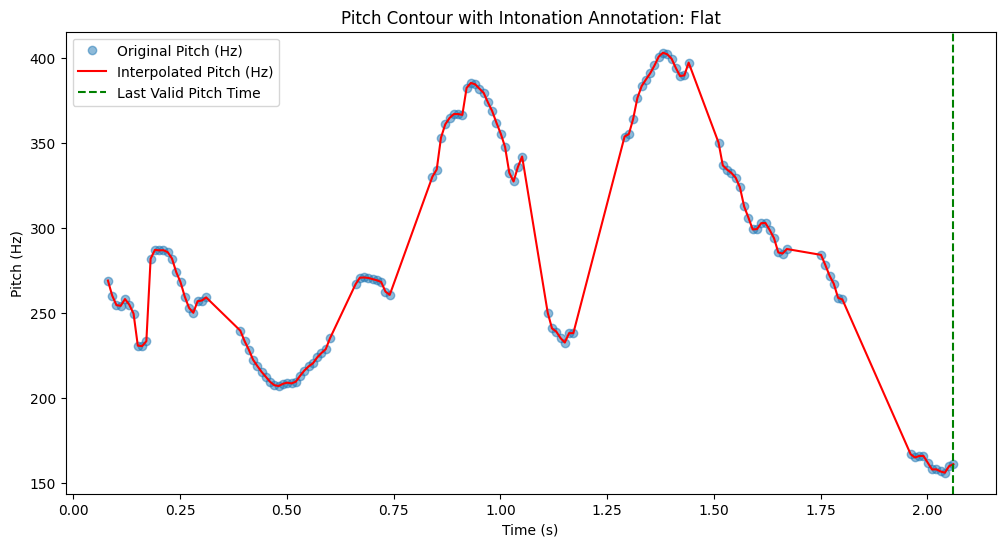

Intonation Annotation: Flat


In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def extract_and_interpolate_pitch_with_annotation(
    sound_path,
    time_step=0.01,
    pitch_floor=75,
    pitch_ceiling=600,
    rise_threshold=5,
    fall_threshold=-5
):
    """
    Extract pitch contour from a sound file, interpolate missing values,
    and annotate intonation based on the last valid pitch segment.

    Parameters:
    - sound_path: str, path to the sound file.
    - time_step: float, time step for pitch analysis.
    - pitch_floor: float, minimum pitch to detect.
    - pitch_ceiling: float, maximum pitch to detect.
    - rise_threshold: float, threshold for detecting rising intonation.
    - fall_threshold: float, threshold for detecting falling intonation.

    Returns:
    - pitch_times: numpy.ndarray, time points of the pitch contour.
    - interpolated_pitch: numpy.ndarray, interpolated pitch values.
    - annotation: str, intonation annotation ("Rising", "Falling", or "Flat").
    """
    # 1. Load sound
    sound = parselmouth.Sound(sound_path)

    # 2. Extract pitch
    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']  # Extract pitch values (Hz)
    pitch_times = pitch.xs()  # Extract corresponding time values

    # Replace unvoiced/unmeasured parts (0 Hz) with NaN
    pitch_values[pitch_values == 0] = np.nan

    # Identify the last valid pitch time
    valid_idx = ~np.isnan(pitch_values)  # Boolean array for valid pitches
    if valid_idx.any():  # Ensure there are valid pitch values
        last_valid_time = pitch_times[valid_idx][-1]
    else:
        last_valid_time = 0  # If no valid pitch, set to start time

    # Interpolate valid pitch values
    interp_function = interp1d(
        pitch_times[valid_idx],
        pitch_values[valid_idx],
        kind='linear',
        bounds_error=False,
        fill_value=np.nan  # No extrapolation beyond valid range
    )
    interpolated_pitch = interp_function(pitch_times)

    # Mask times beyond the last valid pitch time
    interpolated_pitch[pitch_times > last_valid_time] = np.nan

    # 3. Annotate intonation based on the last valid pitch range
    valid_pitch_times = pitch_times[pitch_times <= last_valid_time]
    valid_pitch_values = interpolated_pitch[pitch_times <= last_valid_time]

    if len(valid_pitch_values) < 2 or np.isnan(valid_pitch_values).all():
        annotation = "No pitch detected"
    else:
        pitch_change = valid_pitch_values[-1] - valid_pitch_values[0]  # Pitch change over time
        if pitch_change > rise_threshold:  # Rising pitch
            annotation = "Rising"
        elif pitch_change < fall_threshold:  # Falling pitch
            annotation = "Falling"
        else:  # Flat pitch
            annotation = "Flat"

    # 4. Plot original and interpolated pitch with annotation
    plt.figure(figsize=(12, 6))
    plt.plot(pitch_times, pitch_values, 'o', label='Original Pitch (Hz)', alpha=0.5)
    plt.plot(pitch_times, interpolated_pitch, '-', label='Interpolated Pitch (Hz)', color='red')
    plt.axvline(x=last_valid_time, color='green', linestyle='--', label='Last Valid Pitch Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.legend()
    plt.title(f'Pitch Contour with Intonation Annotation: {annotation}')
    plt.show()

    return pitch_times, interpolated_pitch, annotation

# Example usage
sound_file = audio_file  # Replace with your actual file path
pitch_times, interpolated_pitch, annotation = extract_and_interpolate_pitch_with_annotation(sound_file)
print(f"Intonation Annotation: {annotation}")


### 변화량을 계산한 근거를 그래프 상에서 표시하고, 어떤 기준에 의해 Flat으로 결정되었는지 설명

In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


def calculate_pitch_change(pitch_times, pitch_values, last_valid_time, rise_threshold=5, fall_threshold=-5):
    """
    Calculate pitch change in the last valid pitch range and annotate intonation.

    Parameters:
    - pitch_times: numpy.ndarray, array of time values.
    - pitch_values: numpy.ndarray, array of pitch values.
    - last_valid_time: float, the last valid time in the pitch contour.
    - rise_threshold: float, threshold for detecting rising intonation.
    - fall_threshold: float, threshold for detecting falling intonation.

    Returns:
    - pitch_change: float, the difference between the last and first pitch in the valid range.
    - annotation: str, the intonation annotation ("Rising", "Falling", "Flat", "No pitch detected").
    """
    valid_pitch_times = pitch_times[pitch_times <= last_valid_time]
    valid_pitch_values = pitch_values[pitch_times <= last_valid_time]

    if len(valid_pitch_values) < 2 or np.isnan(valid_pitch_values).all():
        return 0, "No pitch detected"

    # Calculate pitch change
    pitch_change = valid_pitch_values[-1] - valid_pitch_values[0]

    # Annotate based on thresholds
    if pitch_change > rise_threshold:
        annotation = "Rising"
    elif pitch_change < fall_threshold:
        annotation = "Falling"
    else:
        annotation = "Flat"

    return pitch_change, annotation


def extract_interpolate_and_annotate_pitch(
    sound_path,
    time_step=0.01,
    pitch_floor=75,
    pitch_ceiling=600,
    rise_threshold=5,
    fall_threshold=-5
):
    """
    Extract pitch contour, interpolate missing values, and annotate intonation.
    Visualize the change in pitch for annotated intonation.

    Parameters:
    - sound_path: str, path to the sound file.
    - time_step: float, time step for pitch analysis.
    - pitch_floor: float, minimum pitch to detect.
    - pitch_ceiling: float, maximum pitch to detect.
    - rise_threshold: float, threshold for detecting rising intonation.
    - fall_threshold: float, threshold for detecting falling intonation.

    Returns:
    - pitch_times: numpy.ndarray, time points of the pitch contour.
    - interpolated_pitch: numpy.ndarray, interpolated pitch values.
    - annotation: str, intonation annotation.
    """
    # 1. Load sound
    sound = parselmouth.Sound(sound_path)

    # 2. Extract pitch
    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']  # Extract pitch values (Hz)
    pitch_times = pitch.xs()  # Extract corresponding time values

    # Replace unvoiced/unmeasured parts (0 Hz) with NaN
    pitch_values[pitch_values == 0] = np.nan

    # Identify the last valid pitch time
    valid_idx = ~np.isnan(pitch_values)
    if valid_idx.any():
        last_valid_time = pitch_times[valid_idx][-1]
    else:
        last_valid_time = 0

    # Interpolate valid pitch values
    interp_function = interp1d(
        pitch_times[valid_idx],
        pitch_values[valid_idx],
        kind='linear',
        bounds_error=False,
        fill_value=np.nan
    )
    interpolated_pitch = interp_function(pitch_times)

    # Mask times beyond the last valid pitch time
    interpolated_pitch[pitch_times > last_valid_time] = np.nan

    # 3. Calculate pitch change and annotate intonation
    pitch_change, annotation = calculate_pitch_change(
        pitch_times, interpolated_pitch, last_valid_time, rise_threshold, fall_threshold
    )

    # 4. Plot original and interpolated pitch
    plt.figure(figsize=(14, 7))
    plt.plot(pitch_times, pitch_values, 'o', label='Original Pitch (Hz)', alpha=0.5)
    plt.plot(pitch_times, interpolated_pitch, '-', label='Interpolated Pitch (Hz)', color='red')
    plt.axvline(x=last_valid_time, color='green', linestyle='--', label='Last Valid Pitch Time')

    # Highlight the last valid pitch range
    valid_pitch_times = pitch_times[pitch_times <= last_valid_time]
    valid_pitch_values = interpolated_pitch[pitch_times <= last_valid_time]
    plt.plot(valid_pitch_times, valid_pitch_values, label='Last Valid Pitch Range', color='blue')
    plt.scatter(valid_pitch_times[0], valid_pitch_values[0], color='purple', label='Start Pitch')
    plt.scatter(valid_pitch_times[-1], valid_pitch_values[-1], color='orange', label='End Pitch')

    # Annotate pitch change
    plt.text(
        valid_pitch_times[-1],
        valid_pitch_values[-1],
        f'ΔPitch: {pitch_change:.2f} Hz',
        fontsize=12,
        color='black',
        verticalalignment='bottom'
    )

    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.legend()
    plt.title(f'Pitch Contour with Intonation Annotation: {annotation}')
    plt.show()

    return pitch_times, interpolated_pitch, annotation





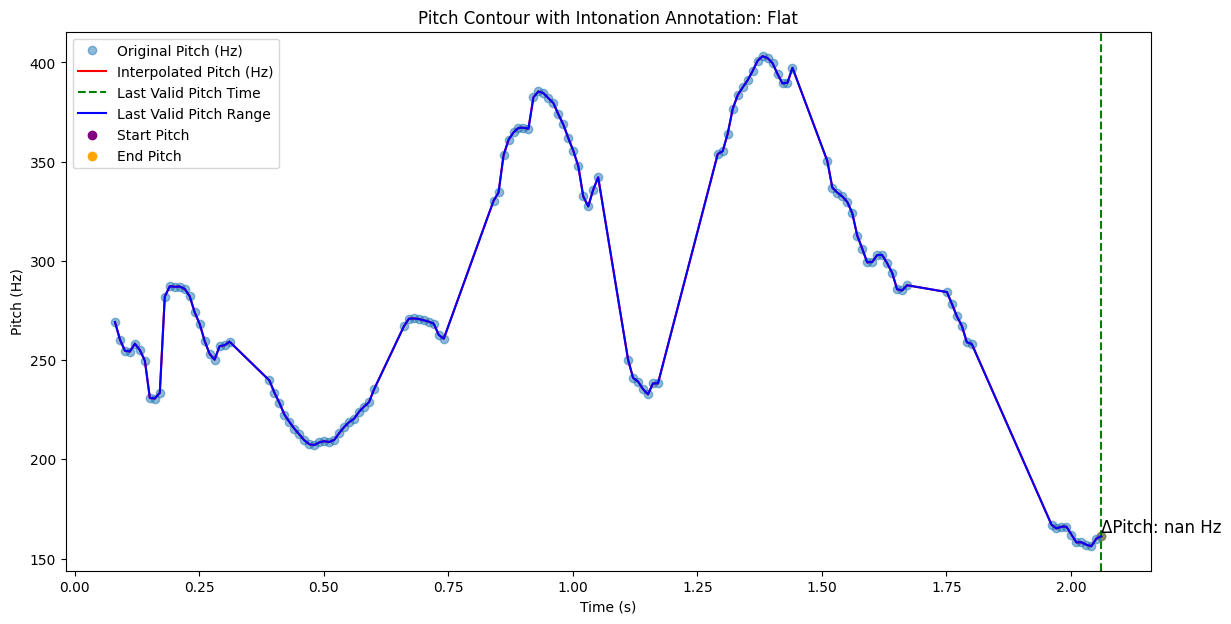

Intonation Annotation: Flat


In [ ]:
# Example usage
sound_file = audio_file # Replace with your actual file path
pitch_times, interpolated_pitch, annotation = extract_interpolate_and_annotate_pitch(sound_file)
print(f"Intonation Annotation: {annotation}")

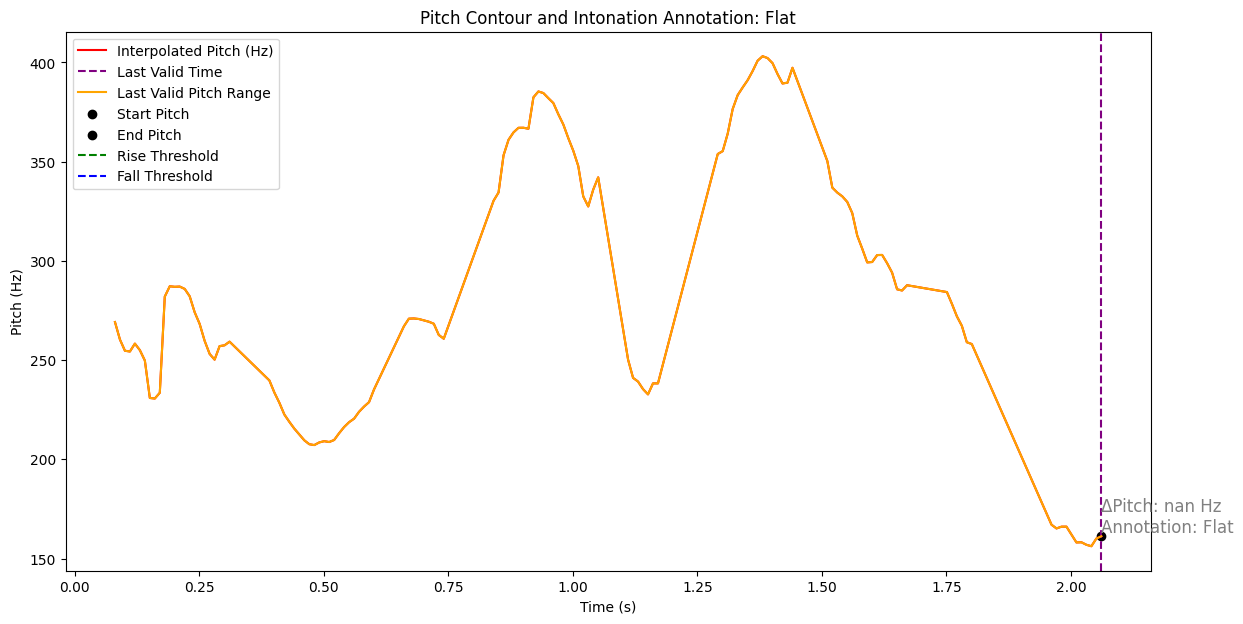

In [ ]:
# import parselmouth
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d


def calculate_pitch_change(pitch_times, pitch_values, last_valid_time):
    """
    Calculate pitch change and return detailed information.
    """
    valid_pitch_times = pitch_times[pitch_times <= last_valid_time]
    valid_pitch_values = pitch_values[pitch_times <= last_valid_time]

    if len(valid_pitch_values) < 2 or np.isnan(valid_pitch_values).all():
        return 0, "No pitch detected"

    pitch_start = valid_pitch_values[0]
    pitch_end = valid_pitch_values[-1]
    pitch_change = pitch_end - pitch_start

    return pitch_start, pitch_end, pitch_change


def visualize_pitch_change(pitch_times, interpolated_pitch, last_valid_time, pitch_start, pitch_end, pitch_change, rise_threshold, fall_threshold):
    """
    Visualize pitch change with annotations and thresholds.
    """
    valid_pitch_times = pitch_times[pitch_times <= last_valid_time]
    valid_pitch_values = interpolated_pitch[pitch_times <= last_valid_time]

    # Annotate intonation
    if pitch_change > rise_threshold:
        annotation = "Rising"
        color = "green"
    elif pitch_change < fall_threshold:
        annotation = "Falling"
        color = "blue"
    else:
        annotation = "Flat"
        color = "gray"

    # Plot original and interpolated pitch
    plt.figure(figsize=(14, 7))
    plt.plot(pitch_times, interpolated_pitch, label='Interpolated Pitch (Hz)', color='red')
    plt.axvline(x=last_valid_time, color='purple', linestyle='--', label='Last Valid Time')

    # Highlight pitch range and annotate thresholds
    plt.plot(valid_pitch_times, valid_pitch_values, label='Last Valid Pitch Range', color='orange')
    plt.scatter(valid_pitch_times[0], pitch_start, color='black', label='Start Pitch')
    plt.scatter(valid_pitch_times[-1], pitch_end, color='black', label='End Pitch')

    # Threshold lines
    plt.axhline(y=pitch_start + rise_threshold, color='green', linestyle='--', label='Rise Threshold')
    plt.axhline(y=pitch_start + fall_threshold, color='blue', linestyle='--', label='Fall Threshold')

    # Annotate change
    plt.text(valid_pitch_times[-1], pitch_end, f'ΔPitch: {pitch_change:.2f} Hz\nAnnotation: {annotation}',
             fontsize=12, color=color, verticalalignment='bottom')

    # Plot details
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.legend()
    plt.title(f'Pitch Contour and Intonation Annotation: {annotation}')
    plt.show()


def extract_and_annotate_pitch_with_visualization(
    sound_path,
    time_step=0.01,
    pitch_floor=75,
    pitch_ceiling=600,
    rise_threshold=5,
    fall_threshold=-5
):
    """
    Extract pitch, interpolate, calculate change, and visualize annotation.
    """
    # 1. Load sound and extract pitch
    sound = parselmouth.Sound(sound_path)
    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']
    pitch_times = pitch.xs()

    # Replace unvoiced/unmeasured parts with NaN
    pitch_values[pitch_values == 0] = np.nan

    # Identify last valid pitch time
    valid_idx = ~np.isnan(pitch_values)
    if valid_idx.any():
        last_valid_time = pitch_times[valid_idx][-1]
    else:
        last_valid_time = 0

    # Interpolate missing values
    interp_function = interp1d(
        pitch_times[valid_idx],
        pitch_values[valid_idx],
        kind='linear',
        bounds_error=False,
        fill_value=np.nan
    )
    interpolated_pitch = interp_function(pitch_times)
    interpolated_pitch[pitch_times > last_valid_time] = np.nan

    # Calculate pitch change
    pitch_start, pitch_end, pitch_change = calculate_pitch_change(pitch_times, interpolated_pitch, last_valid_time)

    # Visualize results
    visualize_pitch_change(
        pitch_times, interpolated_pitch, last_valid_time, pitch_start, pitch_end, pitch_change,
        rise_threshold, fall_threshold
    )


# Example usage
sound_file = audio_file  # Replace with your actual sound file path
extract_and_annotate_pitch_with_visualization(sound_file)


pitch slope를 구하기 위한 구간을, 외부에서 인자로 입력받은 마지막 음절 발화 시간으로 두고, 해당 구간 내에서 pitch의 시작점과 끝점 사이 기울기를 구한다.

그리고 기울기에 따라 억양 주석을 단다. 억양 주석은 총 4가지 경우에 따라 2개 중 하나로 달며, 해당 기울기가 양의 기울기이면 오름조 (H%),  음의 기울기이면 내림조 (L%)이다.

해당 구간(마지막 음절) 내의 pitch 기울기가 평탄한 편이라면, 마지막 음절 구간(intonation phrase) 진입 직전까지 측정된 pitch 값이 전체 문장의 pitch에 비해 높은 편인지 낮은 편인지 확인하여 L%와 H% 중 하나로 주석을 단다. 즉, 전체적으로 높은 pitch이면 H%, 낮은 피치이면 L%이다.

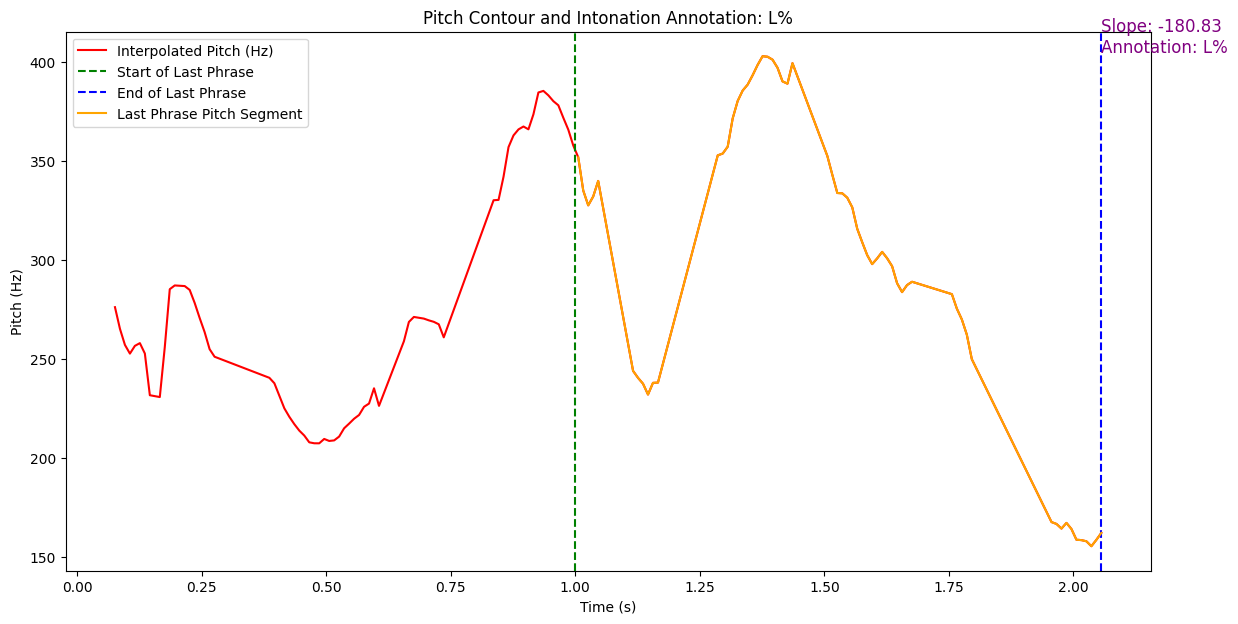

Intonation annotation: L%


In [ ]:
import parselmouth
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


def calculate_pitch_slope(pitch_times, pitch_values, start_time, end_time):
    """
    Calculate the pitch slope within the specified time range.
    """
    # Filter pitch values within the specified range
    within_range = (pitch_times >= start_time) & (pitch_times <= end_time)
    segment_times = pitch_times[within_range]
    segment_values = pitch_values[within_range]

    # Ensure there are enough points to calculate slope
    if len(segment_times) < 2 or np.isnan(segment_values).all():
        return None, None, "Insufficient data"

    # Linear regression to calculate slope
    slope = (segment_values[-1] - segment_values[0]) / (segment_times[-1] - segment_times[0])
    return slope, segment_values, "Slope calculated"


def annotate_intonation(slope, segment_values, full_pitch_values, rise_threshold=0.5, flat_threshold=0.1):
    """
    Annotate intonation based on pitch slope and overall pitch context.
    """
    if slope is None:
        return "No annotation (insufficient data)"

    if slope > rise_threshold:
        return "H%"  # Rising intonation
    elif slope < -rise_threshold:
        return "L%"  # Falling intonation
    elif abs(slope) <= flat_threshold:
        # Check if last segment pitch is high or low relative to the full sentence
        full_mean_pitch = np.nanmean(full_pitch_values)
        segment_mean_pitch = np.nanmean(segment_values)
        return "H%" if segment_mean_pitch > full_mean_pitch else "L%"
    else:
        return "Flat"


def process_and_annotate_pitch(
    sound_path,
    last_phrase_start=1.0,  # Hardcoded start time for last phrase
    time_step=0.01,
    pitch_floor=100,
    pitch_ceiling=450,
    rise_threshold=0.5,
    flat_threshold=0.1
):
    """
    Process the sound file, calculate pitch slope, and annotate intonation.
    """
    # Load sound and extract pitch
    sound = parselmouth.Sound(sound_path)
    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']
    pitch_times = pitch.xs()

    # Replace unvoiced/unmeasured parts with NaN
    pitch_values[pitch_values == 0] = np.nan

    # Interpolate missing values
    valid_idx = ~np.isnan(pitch_values)
    interp_function = interp1d(
        pitch_times[valid_idx],
        pitch_values[valid_idx],
        kind="linear",
        bounds_error=False,
        fill_value=np.nan
    )
    interpolated_pitch = interp_function(pitch_times)

    # Define the end time as the last valid pitch measurement
    last_valid_time = pitch_times[~np.isnan(interpolated_pitch)][-1]

    # Calculate pitch slope for the last phrase
    slope, segment_values, status = calculate_pitch_slope(
        pitch_times, interpolated_pitch, last_phrase_start, last_valid_time
    )

    # Annotate intonation
    annotation = annotate_intonation(
        slope, segment_values, interpolated_pitch, rise_threshold, flat_threshold
    )

    # Visualize results
    visualize_pitch_and_annotation(
        pitch_times, interpolated_pitch, last_phrase_start, last_valid_time, slope, annotation
    )

    return annotation


def visualize_pitch_and_annotation(
    pitch_times, pitch_values, start_time, end_time, slope, annotation
):
    """
    Visualize the pitch contour and the intonation annotation.
    """
    within_range = (pitch_times >= start_time) & (pitch_times <= end_time)
    segment_times = pitch_times[within_range]
    segment_values = pitch_values[within_range]

    plt.figure(figsize=(14, 7))
    plt.plot(pitch_times, pitch_values, label="Interpolated Pitch (Hz)", color="red")
    plt.axvline(x=start_time, color="green", linestyle="--", label="Start of Last Phrase")
    plt.axvline(x=end_time, color="blue", linestyle="--", label="End of Last Phrase")
    plt.plot(segment_times, segment_values, label="Last Phrase Pitch Segment", color="orange")

    # Annotate slope and result
    if slope is not None:
        slope_text = f"Slope: {slope:.2f}"
    else:
        slope_text = "Slope: N/A"
    plt.text(end_time, np.nanmax(pitch_values), f"{slope_text}\nAnnotation: {annotation}",
             fontsize=12, color="purple", verticalalignment="bottom")

    plt.xlabel("Time (s)")
    plt.ylabel("Pitch (Hz)")
    plt.legend()
    plt.title(f"Pitch Contour and Intonation Annotation: {annotation}")
    plt.show()


# Example usage
sound_file = audio_file  # Replace with your actual sound file path
annotation = process_and_annotate_pitch(
    sound_file
)
print(f"Intonation annotation: {annotation}")


### 마지막 음절 임의로 재설정 후 다시 확인

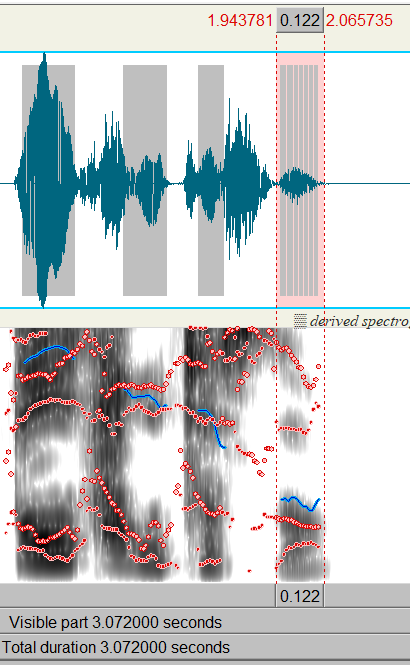

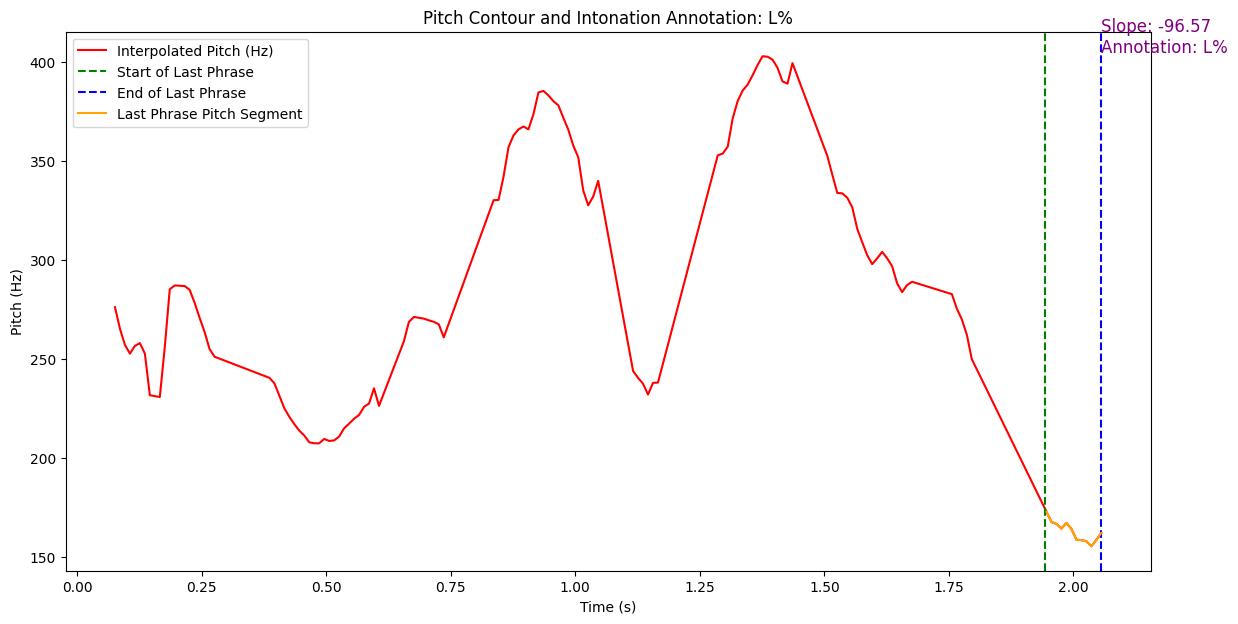

Intonation annotation: L%


In [ ]:
def calculate_pitch_slope(pitch_times, pitch_values, start_time, end_time):
    """
    Calculate the pitch slope within the specified time range.
    """
    # Filter pitch values within the specified range
    within_range = (pitch_times >= start_time) & (pitch_times <= end_time)
    segment_times = pitch_times[within_range]
    segment_values = pitch_values[within_range]

    # Ensure there are enough points to calculate slope
    if len(segment_times) < 2 or np.isnan(segment_values).all():
        return None, None, "Insufficient data"

    # Linear regression to calculate slope
    slope = (segment_values[-1] - segment_values[0]) / (segment_times[-1] - segment_times[0])
    return slope, segment_values, "Slope calculated"


def annotate_intonation(slope, segment_values, full_pitch_values, rise_threshold=0.5, flat_threshold=0.1):
    """
    Annotate intonation based on pitch slope and overall pitch context.
    """
    if slope is None:
        return "No annotation (insufficient data)"

    if slope > rise_threshold:
        return "H%"  # Rising intonation
    elif slope < -rise_threshold:
        return "L%"  # Falling intonation
    elif abs(slope) <= flat_threshold:
        # Check if last segment pitch is high or low relative to the full sentence
        full_mean_pitch = np.nanmean(full_pitch_values)
        segment_mean_pitch = np.nanmean(segment_values)
        return "H%" if segment_mean_pitch > full_mean_pitch else "L%"
    else:
        return "Flat"


def process_and_annotate_pitch(
    sound_path,
    last_phrase_start=1.943,  # Hardcoded start time for last phrase
    time_step=0.01,
    pitch_floor=100,
    pitch_ceiling=450,
    rise_threshold=0.5,
    flat_threshold=0.1
):
    """
    Process the sound file, calculate pitch slope, and annotate intonation.
    """
    # Load sound and extract pitch
    sound = parselmouth.Sound(sound_path)
    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']
    pitch_times = pitch.xs()

    # Replace unvoiced/unmeasured parts with NaN
    pitch_values[pitch_values == 0] = np.nan

    # Interpolate missing values
    valid_idx = ~np.isnan(pitch_values)
    interp_function = interp1d(
        pitch_times[valid_idx],
        pitch_values[valid_idx],
        kind="linear",
        bounds_error=False,
        fill_value=np.nan
    )
    interpolated_pitch = interp_function(pitch_times)

    # Define the end time as the last valid pitch measurement
    last_valid_time = pitch_times[~np.isnan(interpolated_pitch)][-1]

    # Calculate pitch slope for the last phrase
    slope, segment_values, status = calculate_pitch_slope(
        pitch_times, interpolated_pitch, last_phrase_start, last_valid_time
    )

    # Annotate intonation
    annotation = annotate_intonation(
        slope, segment_values, interpolated_pitch, rise_threshold, flat_threshold
    )

    # Visualize results
    visualize_pitch_and_annotation(
        pitch_times, interpolated_pitch, last_phrase_start, last_valid_time, slope, annotation
    )

    return annotation


def visualize_pitch_and_annotation(
    pitch_times, pitch_values, start_time, end_time, slope, annotation
):
    """
    Visualize the pitch contour and the intonation annotation.
    """
    within_range = (pitch_times >= start_time) & (pitch_times <= end_time)
    segment_times = pitch_times[within_range]
    segment_values = pitch_values[within_range]

    plt.figure(figsize=(14, 7))
    plt.plot(pitch_times, pitch_values, label="Interpolated Pitch (Hz)", color="red")
    plt.axvline(x=start_time, color="green", linestyle="--", label="Start of Last Phrase")
    plt.axvline(x=end_time, color="blue", linestyle="--", label="End of Last Phrase")
    plt.plot(segment_times, segment_values, label="Last Phrase Pitch Segment", color="orange")

    # Annotate slope and result
    if slope is not None:
        slope_text = f"Slope: {slope:.2f}"
    else:
        slope_text = "Slope: N/A"
    plt.text(end_time, np.nanmax(pitch_values), f"{slope_text}\nAnnotation: {annotation}",
             fontsize=12, color="purple", verticalalignment="bottom")

    plt.xlabel("Time (s)")
    plt.ylabel("Pitch (Hz)")
    plt.legend()
    plt.title(f"Pitch Contour and Intonation Annotation: {annotation}")
    plt.show()


# Example usage
sound_file = audio_file  # Replace with your actual sound file path
annotation = process_and_annotate_pitch(
    sound_file
)
print(f"Intonation annotation: {annotation}")


# 6. 선형회귀 선으로 기울기를 표현

In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression

def calculate_pitch_slope(pitch_times, pitch_values, start_time, end_time):
    """
    Calculate the pitch slope within the specified time range.
    """
    # Filter pitch values within the specified range
    within_range = (pitch_times >= start_time) & (pitch_times <= end_time)
    segment_times = pitch_times[within_range]
    segment_values = pitch_values[within_range]

    # Ensure there are enough points to calculate slope
    if len(segment_times) < 2 or np.isnan(segment_values).all():
        return None, None, "Insufficient data"

    # Linear regression to calculate slope
    model = LinearRegression()
    model.fit(segment_times.reshape(-1, 1), segment_values)
    slope = model.coef_[0]
    return slope, segment_values, model, "Slope calculated"

def annotate_intonation(slope, segment_values, full_pitch_values, rise_threshold=0.5, flat_threshold=0.1):
    """
    Annotate intonation based on pitch slope and overall pitch context.
    """
    if slope is None:
        return "No annotation (insufficient data)"

    if slope > rise_threshold:
        return "H%"  # Rising intonation
    elif slope < -rise_threshold:
        return "L%"  # Falling intonation
    elif abs(slope) <= flat_threshold:
        # Check if last segment pitch is high or low relative to the full sentence
        full_mean_pitch = np.nanmean(full_pitch_values)
        segment_mean_pitch = np.nanmean(segment_values)
        return "H%" if segment_mean_pitch > full_mean_pitch else "L%"
    else:
        return "Flat"

def process_and_annotate_pitch(
    sound_path,
    last_phrase_start=1.943,  # Hardcoded start time for last phrase
    time_step=0.01,
    pitch_floor=100,
    pitch_ceiling=450,
    rise_threshold=0.5,
    flat_threshold=0.1
):
    """
    Process the sound file, calculate pitch slope, and annotate intonation.
    """
    # Load sound and extract pitch
    sound = parselmouth.Sound(sound_path)
    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']
    pitch_times = pitch.xs()

    # Replace unvoiced/unmeasured parts with NaN
    pitch_values[pitch_values == 0] = np.nan

    # Interpolate missing values
    valid_idx = ~np.isnan(pitch_values)
    interp_function = interp1d(
        pitch_times[valid_idx],
        pitch_values[valid_idx],
        kind="linear",
        bounds_error=False,
        fill_value=np.nan
    )
    interpolated_pitch = interp_function(pitch_times)

    # Define the end time as the last valid pitch measurement
    last_valid_time = pitch_times[~np.isnan(interpolated_pitch)][-1]

    # Calculate pitch slope for the last phrase
    slope, segment_values, regression_model, status = calculate_pitch_slope(
        pitch_times, interpolated_pitch, last_phrase_start, last_valid_time
    )

    # Annotate intonation
    annotation = annotate_intonation(
        slope, segment_values, interpolated_pitch, rise_threshold, flat_threshold
    )

    # Visualize results
    visualize_pitch_and_annotation(
        pitch_times, interpolated_pitch, last_phrase_start, last_valid_time, slope, annotation, regression_model
    )

    return annotation


def visualize_pitch_and_annotation(
    pitch_times, pitch_values, start_time, end_time, slope, annotation, regression_model
):
    """
    Visualize the pitch contour, intonation annotation, and linear regression line.
    """
    within_range = (pitch_times >= start_time) & (pitch_times <= end_time)
    segment_times = pitch_times[within_range]
    segment_values = pitch_values[within_range]

    plt.figure(figsize=(14, 7))
    plt.plot(pitch_times, pitch_values, label="Interpolated Pitch (Hz)", color="red")
    plt.axvline(x=start_time, color="green", linestyle="--", label="Start of Last Phrase")
    plt.axvline(x=end_time, color="blue", linestyle="--", label="End of Last Phrase")
    plt.plot(segment_times, segment_values, label="Last Phrase Pitch Segment", color="orange")

    # Plot the regression line
    regression_line = regression_model.predict(segment_times.reshape(-1, 1))
    plt.plot(segment_times, regression_line, label="Linear Regression Line", color="purple", linestyle="--")

    # Annotate slope and result
    if slope is not None:
        slope_text = f"Slope: {slope:.2f}"
    else:
        slope_text = "Slope: N/A"
    plt.text(end_time, np.nanmax(pitch_values), f"{slope_text}\nAnnotation: {annotation}",
             fontsize=12, color="purple", verticalalignment="bottom")

    plt.xlabel("Time (s)")
    plt.ylabel("Pitch (Hz)")
    plt.legend()
    plt.title(f"Pitch Contour and Intonation Annotation: {annotation}")
    plt.show()





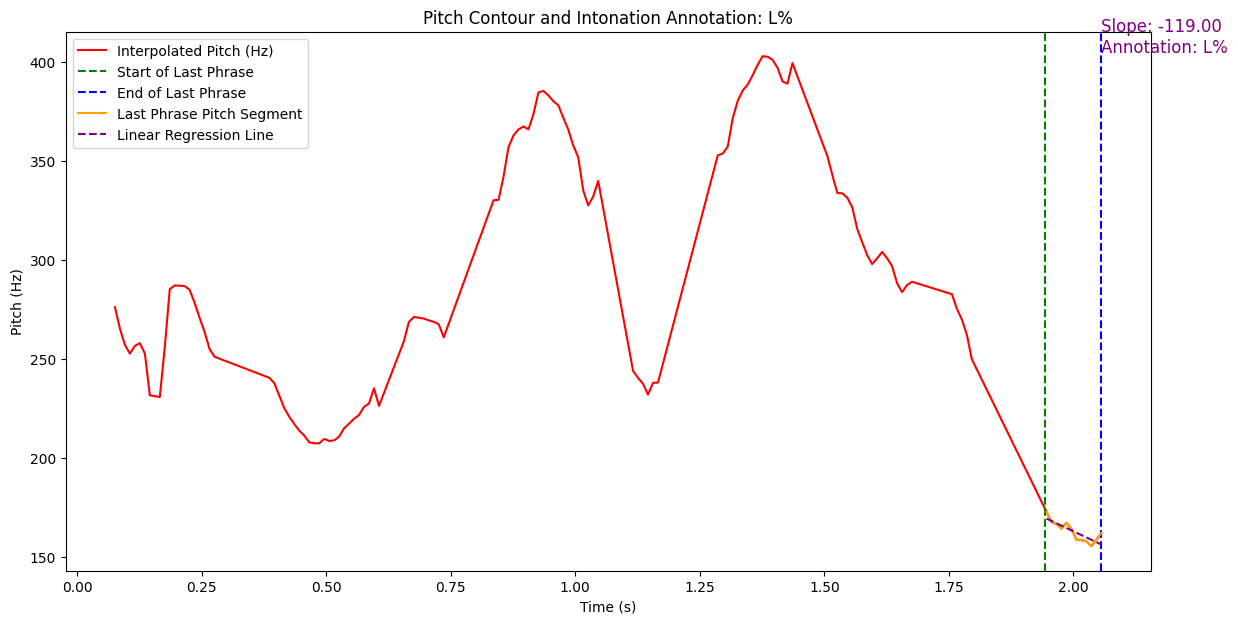

Intonation annotation: L%


In [ ]:
# Example usage
sound_file = audio_file  # Replace with your actual sound file path
annotation = process_and_annotate_pitch(
    sound_file
)
print(f"Intonation annotation: {annotation}")

# 7. Extract Intonation Feature from DACON dataset: Pitch Slope, IP label



## 1) 데이터셋 구성: 훈련100, 평가50 각각 랜덤으로 추출

In [ ]:
from google.colab import files
import zipfile
import os

# Zip 파일 업로드
uploaded_train_zip = files.upload()  # Train zip file upload
uploaded_test_zip = files.upload()   # Test zip file upload

# 업로드된 zip 파일명 추출
train_zip_file = list(uploaded_train_zip.keys())[0]
test_zip_file = list(uploaded_test_zip.keys())[0]

# Zip 파일 추출 경로
train_extract_dir = '/content/train_data'
test_extract_dir = '/content/test_data'

# Zip 파일 추출
with zipfile.ZipFile(train_zip_file, 'r') as zip_ref:
    zip_ref.extractall(train_extract_dir)

with zipfile.ZipFile(test_zip_file, 'r') as zip_ref:
    zip_ref.extractall(test_extract_dir)

# 추출된 파일 확인
print("Train .wav files:", os.listdir(train_extract_dir))
print("Test .wav files:", os.listdir(test_extract_dir))


Saving train_sample.zip to train_sample.zip


Saving test_sample.zip to test_sample.zip
Train .wav files: ['TRAIN_2206.wav', 'TRAIN_3038.wav', 'TRAIN_4460.wav', 'TRAIN_1218.wav', 'TRAIN_1410.wav', 'TRAIN_2832.wav', 'TRAIN_4996.wav', 'TRAIN_4534.wav', 'TRAIN_0875.wav', 'TRAIN_3252.wav', 'TRAIN_0572.wav', 'TRAIN_2178.wav', 'TRAIN_2987.wav', 'TRAIN_0146.wav', 'TRAIN_4473.wav', 'TRAIN_0082.wav', 'TRAIN_3572.wav', 'TRAIN_2473.wav', 'TRAIN_2403.wav', 'TRAIN_4678.wav', 'TRAIN_2479.wav', 'TRAIN_1810.wav', 'TRAIN_1438.wav', 'TRAIN_3177.wav', 'TRAIN_3976.wav', 'TRAIN_2507.wav', 'TRAIN_4476.wav', 'TRAIN_1917.wav', 'TRAIN_2205.wav', 'TRAIN_1316.wav', 'TRAIN_4016.wav', 'TRAIN_2879.wav', 'TRAIN_3703.wav', 'TRAIN_3353.wav', 'TRAIN_2334.wav', 'TRAIN_1019.wav', 'TRAIN_1286.wav', 'TRAIN_2520.wav', 'TRAIN_1226.wav', 'TRAIN_4987.wav', 'TRAIN_3190.wav', 'TRAIN_1377.wav', 'TRAIN_4227.wav', 'TRAIN_2811.wav', 'TRAIN_4991.wav', 'TRAIN_3284.wav', 'TRAIN_1370.wav', 'TRAIN_3961.wav', 'TRAIN_2607.wav', 'TRAIN_0440.wav', 'TRAIN_3082.wav', 'TRAIN_1001.wav', 'TR

In [ ]:
import os
import pandas as pd
from google.colab import files

# 파일 업로드
uploaded_train_csv = files.upload()  # Upload train.csv
uploaded_test_csv = files.upload()   # Upload test.csv

# 업로드된 CSV 파일 경로
train_csv_path = list(uploaded_train_csv.keys())[0]  # 업로드된 train CSV 파일명
test_csv_path = list(uploaded_test_csv.keys())[0]    # 업로드된 test CSV 파일명

# CSV 파일 읽기
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)


# 업로드된 .wav 파일 폴더 경로
train_wav_folder = '/content/train_data'
test_wav_folder = '/content/test_data'

# .wav 파일 경로 리스트 생성 (파일 이름만 추출)
train_wav_files = os.listdir(train_wav_folder)
test_wav_files = os.listdir(test_wav_folder)

# train, test 폴더에서 .wav 파일의 id를 추출 (파일명에서 .wav 확장자를 제거)
train_ids = [os.path.splitext(file)[0] for file in train_wav_files]
test_ids = [os.path.splitext(file)[0] for file in test_wav_files]

# train과 test DataFrame에서 id가 .wav 파일과 일치하는 행만 추출
train_df_filtered = train_df[train_df['id'].isin(train_ids)]
test_df_filtered = test_df[test_df['id'].isin(test_ids)]

# 필터링된 데이터를 새로운 CSV 파일로 저장
train_filtered_csv_path = '/content/filtered_train.csv'
test_filtered_csv_path = '/content/filtered_test.csv'

train_df_filtered.to_csv(train_filtered_csv_path, index=False)
test_df_filtered.to_csv(test_filtered_csv_path, index=False)

print(f"Filtered train CSV is saved at: {train_filtered_csv_path}")
print(f"Filtered test CSV is saved at: {test_filtered_csv_path}")


Saving train.csv to train.csv


Saving test.csv to test.csv
Filtered train CSV is saved at: /content/filtered_train.csv
Filtered test CSV is saved at: /content/filtered_test.csv


In [ ]:
# Example usage
csv_file = '/content/filtered_train.csv'  # Original CSV file path
output_csv_file = '/content/with_features/train_data_with_features.csv'  # Output CSV file path

extract_features_from_csv(csv_file, output_csv_file)
print("Feature extraction completed and saved to new CSV.")


Processing ./train/TRAIN_0005.wav...
Error reading ./train/TRAIN_0005.wav: Cannot open file “/content/./train/TRAIN_0005.wav”.
Sound not read from sound file “/content/./train/TRAIN_0005.wav”.
Processing ./train/TRAIN_0064.wav...
Error reading ./train/TRAIN_0064.wav: Cannot open file “/content/./train/TRAIN_0064.wav”.
Sound not read from sound file “/content/./train/TRAIN_0064.wav”.
Processing ./train/TRAIN_0082.wav...
Error reading ./train/TRAIN_0082.wav: Cannot open file “/content/./train/TRAIN_0082.wav”.
Sound not read from sound file “/content/./train/TRAIN_0082.wav”.
Processing ./train/TRAIN_0146.wav...
Error reading ./train/TRAIN_0146.wav: Cannot open file “/content/./train/TRAIN_0146.wav”.
Sound not read from sound file “/content/./train/TRAIN_0146.wav”.
Processing ./train/TRAIN_0253.wav...
Error reading ./train/TRAIN_0253.wav: Cannot open file “/content/./train/TRAIN_0253.wav”.
Sound not read from sound file “/content/./train/TRAIN_0253.wav”.
Processing ./train/TRAIN_0263.wav..

### 억양 처리 에러

In [ ]:
import os
import pandas as pd
import numpy as np
import parselmouth
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d


def calculate_pitch_slope(pitch_times, pitch_values, start_time, end_time):
    """
    Calculate the pitch slope within the specified time range.
    """
    within_range = (pitch_times >= start_time) & (pitch_times <= end_time)
    segment_times = pitch_times[within_range]
    segment_values = pitch_values[within_range]

    if len(segment_times) < 2 or np.isnan(segment_values).all():
        return None, None

    model = LinearRegression()
    model.fit(segment_times.reshape(-1, 1), segment_values)
    slope = model.coef_[0]

    return slope, segment_values


def annotate_intonation(slope, segment_values, full_pitch_values, rise_threshold=0.5, flat_threshold=0.1):
    """
    Annotate intonation based on pitch slope and overall pitch context.
    """
    if slope is None:
        return "No annotation (insufficient data)"

    if slope > rise_threshold:
        return "H%"  # Rising intonation
    elif slope < -rise_threshold:
        return "L%"  # Falling intonation
    elif abs(slope) <= flat_threshold:
        full_mean_pitch = np.nanmean(full_pitch_values)
        segment_mean_pitch = np.nanmean(segment_values)
        return "H%" if segment_mean_pitch > full_mean_pitch else "L%"
    else:
        return "Flat"


def process_audio_file(sound_path, last_phrase_start=1.0, time_step=0.01, pitch_floor=100, pitch_ceiling=450):
    """
    Process the sound file, calculate pitch slope, and annotate intonation.
    """
    # Check if the file exists before processing
    if not os.path.exists(sound_path):
        print(f"File not found: {sound_path}")
        return None, None

    try:
        sound = parselmouth.Sound(sound_path)
    except Exception as e:
        print(f"Error reading {sound_path}: {e}")
        return None, None

    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']
    pitch_times = pitch.xs()

    pitch_values[pitch_values == 0] = np.nan

    valid_idx = ~np.isnan(pitch_values)
    interp_function = interp1d(
        pitch_times[valid_idx],
        pitch_values[valid_idx],
        kind="linear",
        bounds_error=False,
        fill_value=np.nan
    )
    interpolated_pitch = interp_function(pitch_times)

    last_valid_time = pitch_times[~np.isnan(interpolated_pitch)][-1]

    slope, segment_values = calculate_pitch_slope(
        pitch_times, interpolated_pitch, last_phrase_start, last_valid_time
    )

    annotation = annotate_intonation(slope, segment_values, interpolated_pitch)

    return slope, annotation


def extract_features_from_csv(csv_path, output_csv_path, audio_folder):
    """
    Extract pitch slope and intonation annotation for each audio file in the csv file.
    Save the updated csv with the new features.
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)

    slopes = []
    annotations = []

    for idx, row in df.iterrows():
        sound_path = row['path']

        # Convert relative path to absolute path
        absolute_sound_path = os.path.join(audio_folder, sound_path)

        print(f"Processing {absolute_sound_path}...")

        slope, annotation = process_audio_file(absolute_sound_path)

        if slope is not None:
            slopes.append(slope)
            annotations.append(annotation)
        else:
            slopes.append(np.nan)
            annotations.append("Error processing file")

    # Add the new features to the dataframe
    df['pitch_slope'] = slopes
    df['intonation_annotation'] = annotations

    # Save the updated dataframe to a new CSV file
    df.to_csv(output_csv_path, index=False)
    print(f"Updated CSV saved to {output_csv_path}")





In [ ]:
# Example usage
csv_file = '/content/filtered_train.csv'  # Replace with your actual CSV file path
output_csv_file = '/content/with_features/csv_file_with_features.csv'  # Replace with your output path
audio_folder = '/content/train_data'  # The folder where the .wav files are stored

extract_features_from_csv(csv_file, output_csv_file, audio_folder)

Processing /content/train_data/./train/TRAIN_0005.wav...
File not found: /content/train_data/./train/TRAIN_0005.wav
Processing /content/train_data/./train/TRAIN_0064.wav...
File not found: /content/train_data/./train/TRAIN_0064.wav
Processing /content/train_data/./train/TRAIN_0082.wav...
File not found: /content/train_data/./train/TRAIN_0082.wav
Processing /content/train_data/./train/TRAIN_0146.wav...
File not found: /content/train_data/./train/TRAIN_0146.wav
Processing /content/train_data/./train/TRAIN_0253.wav...
File not found: /content/train_data/./train/TRAIN_0253.wav
Processing /content/train_data/./train/TRAIN_0263.wav...
File not found: /content/train_data/./train/TRAIN_0263.wav
Processing /content/train_data/./train/TRAIN_0440.wav...
File not found: /content/train_data/./train/TRAIN_0440.wav
Processing /content/train_data/./train/TRAIN_0572.wav...
File not found: /content/train_data/./train/TRAIN_0572.wav
Processing /content/train_data/./train/TRAIN_0597.wav...
File not found:

### 디버깅 추가

In [ ]:
import os
import pandas as pd
import numpy as np
import parselmouth
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d


def calculate_pitch_slope(pitch_times, pitch_values, start_time, end_time):
    within_range = (pitch_times >= start_time) & (pitch_times <= end_time)
    segment_times = pitch_times[within_range]
    segment_values = pitch_values[within_range]

    if len(segment_times) < 2 or np.isnan(segment_values).all():
        return None, None

    model = LinearRegression()
    model.fit(segment_times.reshape(-1, 1), segment_values)
    slope = model.coef_[0]

    return slope, segment_values


def annotate_intonation(slope, segment_values, full_pitch_values, rise_threshold=0.5, flat_threshold=0.1):
    if slope is None:
        return "No annotation (insufficient data)"

    if slope > rise_threshold:
        return "H%"  # Rising intonation
    elif slope < -rise_threshold:
        return "L%"  # Falling intonation
    elif abs(slope) <= flat_threshold:
        full_mean_pitch = np.nanmean(full_pitch_values)
        segment_mean_pitch = np.nanmean(segment_values)
        return "H%" if segment_mean_pitch > full_mean_pitch else "L%"
    else:
        return "Flat"


def process_audio_file(sound_path, last_phrase_start=1.0, time_step=0.01, pitch_floor=100, pitch_ceiling=450):
    # Check if the file exists before processing
    if not os.path.exists(sound_path):
        print(f"File not found: {sound_path}")
        return None, None

    try:
        sound = parselmouth.Sound(sound_path)
    except Exception as e:
        print(f"Error reading {sound_path}: {e}")
        return None, None

    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']
    pitch_times = pitch.xs()

    pitch_values[pitch_values == 0] = np.nan

    valid_idx = ~np.isnan(pitch_values)
    interp_function = interp1d(
        pitch_times[valid_idx],
        pitch_values[valid_idx],
        kind="linear",
        bounds_error=False,
        fill_value=np.nan
    )
    interpolated_pitch = interp_function(pitch_times)

    last_valid_time = pitch_times[~np.isnan(interpolated_pitch)][-1]

    slope, segment_values = calculate_pitch_slope(
        pitch_times, interpolated_pitch, last_phrase_start, last_valid_time
    )

    annotation = annotate_intonation(slope, segment_values, interpolated_pitch)

    return slope, annotation


def extract_features_from_csv(csv_path, output_csv_path, audio_folder):
    # Load the CSV file
    df = pd.read_csv(csv_path)

    slopes = []
    annotations = []

    for idx, row in df.iterrows():
        sound_path = row['path']

        # Convert relative path to absolute path
        absolute_sound_path = os.path.join(audio_folder, sound_path)

        print(f"Full file path: {absolute_sound_path}")

        # Debug: Check if the file exists
        if not os.path.exists(absolute_sound_path):
            print(f"File not found: {absolute_sound_path}")
            slopes.append(np.nan)
            annotations.append("File not found")
            continue

        slope, annotation = process_audio_file(absolute_sound_path)

        if slope is not None:
            slopes.append(slope)
            annotations.append(annotation)
        else:
            slopes.append(np.nan)
            annotations.append("Error processing file")

    # Add the new features to the dataframe
    df['pitch_slope'] = slopes
    df['intonation_annotation'] = annotations

    # Save the updated dataframe to a new CSV file
    df.to_csv(output_csv_path, index=False)
    print(f"Updated CSV saved to {output_csv_path}")



In [ ]:
# Example usage
csv_file = '/content/filtered_train.csv'  # Replace with your actual CSV file path
output_csv_file = '/content/with_features/csv_file_with_features.csv'  # Replace with your output path
audio_folder = '/content/train_data'  # The folder where the .wav files are stored

extract_features_from_csv(csv_file, output_csv_file, audio_folder)

Full file path: /content/train_data/./train/TRAIN_0005.wav
File not found: /content/train_data/./train/TRAIN_0005.wav
Full file path: /content/train_data/./train/TRAIN_0064.wav
File not found: /content/train_data/./train/TRAIN_0064.wav
Full file path: /content/train_data/./train/TRAIN_0082.wav
File not found: /content/train_data/./train/TRAIN_0082.wav
Full file path: /content/train_data/./train/TRAIN_0146.wav
File not found: /content/train_data/./train/TRAIN_0146.wav
Full file path: /content/train_data/./train/TRAIN_0253.wav
File not found: /content/train_data/./train/TRAIN_0253.wav
Full file path: /content/train_data/./train/TRAIN_0263.wav
File not found: /content/train_data/./train/TRAIN_0263.wav
Full file path: /content/train_data/./train/TRAIN_0440.wav
File not found: /content/train_data/./train/TRAIN_0440.wav
Full file path: /content/train_data/./train/TRAIN_0572.wav
File not found: /content/train_data/./train/TRAIN_0572.wav
Full file path: /content/train_data/./train/TRAIN_0597.w

### 경로 제대로 들어가도록 수정

In [ ]:
import os
import pandas as pd
import numpy as np
import parselmouth
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d


def calculate_pitch_slope(pitch_times, pitch_values, start_time, end_time):
    """
    Calculate the pitch slope within the specified time range.
    """
    within_range = (pitch_times >= start_time) & (pitch_times <= end_time)
    segment_times = pitch_times[within_range]
    segment_values = pitch_values[within_range]

    if len(segment_times) < 2 or np.isnan(segment_values).all():
        return None, None

    model = LinearRegression()
    model.fit(segment_times.reshape(-1, 1), segment_values)
    slope = model.coef_[0]

    return slope, segment_values


def annotate_intonation(slope, segment_values, full_pitch_values, rise_threshold=0.5, flat_threshold=0.1):
    """
    Annotate intonation based on pitch slope and overall pitch context.
    """
    if slope is None:
        return "No annotation (insufficient data)"

    if slope > rise_threshold:
        return "H%"  # Rising intonation
    elif slope < -rise_threshold:
        return "L%"  # Falling intonation
    elif abs(slope) <= flat_threshold:
        full_mean_pitch = np.nanmean(full_pitch_values)
        segment_mean_pitch = np.nanmean(segment_values)
        return "H%" if segment_mean_pitch > full_mean_pitch else "L%"
    else:
        return "Flat"


def process_audio_file(sound_path, last_phrase_start=1.0, time_step=0.01, pitch_floor=100, pitch_ceiling=450):
    """
    Process the sound file, calculate pitch slope, and annotate intonation.
    """
    # Check if the file exists before processing
    if not os.path.exists(sound_path):
        print(f"File not found: {sound_path}")
        return None, None

    try:
        sound = parselmouth.Sound(sound_path)
    except Exception as e:
        print(f"Error reading {sound_path}: {e}")
        return None, None

    pitch = sound.to_pitch(time_step=time_step, pitch_floor=pitch_floor, pitch_ceiling=pitch_ceiling)
    pitch_values = pitch.selected_array['frequency']
    pitch_times = pitch.xs()

    pitch_values[pitch_values == 0] = np.nan

    valid_idx = ~np.isnan(pitch_values)
    interp_function = interp1d(
        pitch_times[valid_idx],
        pitch_values[valid_idx],
        kind="linear",
        bounds_error=False,
        fill_value=np.nan
    )
    interpolated_pitch = interp_function(pitch_times)

    last_valid_time = pitch_times[~np.isnan(interpolated_pitch)][-1]

    slope, segment_values = calculate_pitch_slope(
        pitch_times, interpolated_pitch, last_phrase_start, last_valid_time
    )

    annotation = annotate_intonation(slope, segment_values, interpolated_pitch)

    return slope, annotation


def extract_features_from_csv(csv_path, output_csv_path, audio_folder):
    """
    Extract pitch slope and intonation annotation for each audio file in the csv file.
    Save the updated csv with the new features.
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)

    slopes = []
    annotations = []

    for idx, row in df.iterrows():
        sound_path = row['path']

        # Convert relative path to absolute path
        if sound_path.startswith('./train/'):
            sound_path = os.path.join(audio_folder, sound_path[2:])  # Remove './' and join with audio_folder

        # Debug: Check the final absolute file path
        print(f"Full file path: {sound_path}")

        # Check if the file exists
        if not os.path.exists(sound_path):
            print(f"File not found: {sound_path}")
            slopes.append(np.nan)
            annotations.append("File not found")
            continue

        slope, annotation = process_audio_file(sound_path)

        if slope is not None:
            slopes.append(slope)
            annotations.append(annotation)
        else:
            slopes.append(np.nan)
            annotations.append("Error processing file")

    # Add the new features to the dataframe
    df['pitch_slope'] = slopes
    df['intonation_annotation'] = annotations

    # Save the updated dataframe to a new CSV file
    df.to_csv(output_csv_path, index=False)
    print(f"Updated CSV saved to {output_csv_path}")


In [ ]:
# Example usage
csv_file = '/content/filtered_train.csv'  # Replace with your actual CSV file path
output_csv_file = '/content/with_features/csv_file_with_features.csv'  # Replace with your output path
audio_folder = '/content/train_data'  # The folder where the .wav files are stored

extract_features_from_csv(csv_file, output_csv_file, audio_folder)

Full file path: /content/train_data/train/TRAIN_0005.wav
File not found: /content/train_data/train/TRAIN_0005.wav
Full file path: /content/train_data/train/TRAIN_0064.wav
File not found: /content/train_data/train/TRAIN_0064.wav
Full file path: /content/train_data/train/TRAIN_0082.wav
File not found: /content/train_data/train/TRAIN_0082.wav
Full file path: /content/train_data/train/TRAIN_0146.wav
File not found: /content/train_data/train/TRAIN_0146.wav
Full file path: /content/train_data/train/TRAIN_0253.wav
File not found: /content/train_data/train/TRAIN_0253.wav
Full file path: /content/train_data/train/TRAIN_0263.wav
File not found: /content/train_data/train/TRAIN_0263.wav
Full file path: /content/train_data/train/TRAIN_0440.wav
File not found: /content/train_data/train/TRAIN_0440.wav
Full file path: /content/train_data/train/TRAIN_0572.wav
File not found: /content/train_data/train/TRAIN_0572.wav
Full file path: /content/train_data/train/TRAIN_0597.wav
File not found: /content/train_

# 8. dacon: 억양 주석부터 다시 만듦

In [ ]:
import os
import pandas as pd
import librosa  # pitch 추출을 위해
import numpy as np
from scipy.signal import find_peaks

# 1. CSV 파일 로드
csv_file_path = '/content/filtered_train.csv'
df = pd.read_csv(csv_file_path)

# 새로운 폴더 경로 지정
output_folder = '/content/with_features'
os.makedirs(output_folder, exist_ok=True)

# 2. pitch 기울기 추출 및 억양 주석 달기
def extract_pitch_and_intonation(file_path):
    # librosa로 .wav 파일 로드
    y, sr = librosa.load(file_path)

    # Pitch 추출: librosa의 pitch 추정 함수 사용 (음성의 주파수 추정)
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

    # 각 시간 프레임에서 가장 높은 pitch를 추출
    pitch = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()
        pitch.append(pitches[index, t])

    # pitch 기울기 계산
    pitch = np.array(pitch)
    pitch_slope = np.gradient(pitch)  # 기울기 추출

    # 억양 주석: pitch 변화량이 큰 부분을 강조
    peaks, _ = find_peaks(pitch_slope, height=0.1)  # 임계값은 조정 가능
    intonation_annotation = ['rising' if i in peaks else 'falling' for i in range(len(pitch_slope))]

    return pitch_slope, intonation_annotation

# 3. 각 파일에 대해 pitch 기울기와 억양 주석 추가
pitch_slope_list = []
intonation_annotation_list = []

# for index, row in df.iterrows():
#     file_path = os.path.join('./content', row['path'])
for index, row in df.iterrows():
    # row['path']의 ./train을 /content/train_data로 변환
    file_path = row['path'].replace('./train', '/content/train_data')
    print(file_path)  # 확인용 출력 (필요 시 제거)

    pitch_slope, intonation_annotation = extract_pitch_and_intonation(file_path)

    pitch_slope_list.append(pitch_slope)
    intonation_annotation_list.append(intonation_annotation)

# 4. 새로운 컬럼을 기존 DataFrame에 추가
df['pitch_slope'] = pitch_slope_list
df['intonation_annotation'] = intonation_annotation_list

# 5. 새로운 .csv 파일로 저장
output_csv_path = os.path.join(output_folder, 'train_data_with_pitch_and_intonation.csv')
df.to_csv(output_csv_path, index=False)

print(f"새로운 데이터가 {output_csv_path}에 저장되었습니다.")


/content/train_data/TRAIN_0005.wav
/content/train_data/TRAIN_0064.wav
/content/train_data/TRAIN_0082.wav
/content/train_data/TRAIN_0146.wav
/content/train_data/TRAIN_0253.wav
/content/train_data/TRAIN_0263.wav
/content/train_data/TRAIN_0440.wav
/content/train_data/TRAIN_0572.wav
/content/train_data/TRAIN_0597.wav
/content/train_data/TRAIN_0606.wav
/content/train_data/TRAIN_0643.wav
/content/train_data/TRAIN_0875.wav
/content/train_data/TRAIN_0899.wav
/content/train_data/TRAIN_1001.wav
/content/train_data/TRAIN_1010.wav
/content/train_data/TRAIN_1019.wav
/content/train_data/TRAIN_1152.wav
/content/train_data/TRAIN_1188.wav
/content/train_data/TRAIN_1218.wav
/content/train_data/TRAIN_1226.wav
/content/train_data/TRAIN_1286.wav
/content/train_data/TRAIN_1316.wav
/content/train_data/TRAIN_1319.wav
/content/train_data/TRAIN_1368.wav
/content/train_data/TRAIN_1370.wav
/content/train_data/TRAIN_1377.wav
/content/train_data/TRAIN_1410.wav
/content/train_data/TRAIN_1438.wav
/content/train_data/

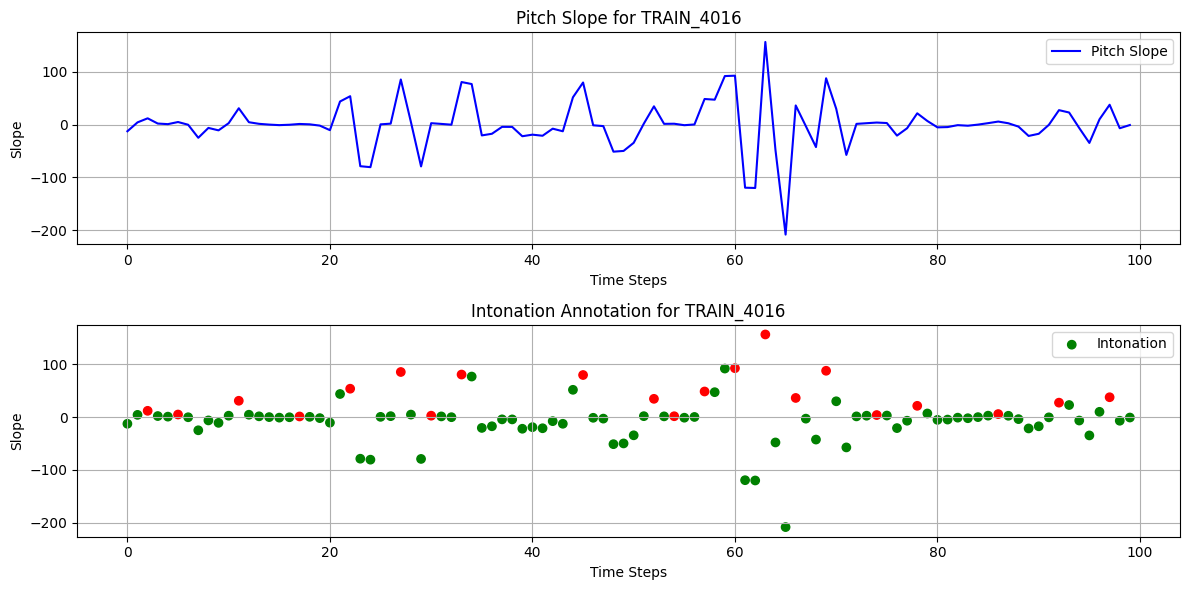

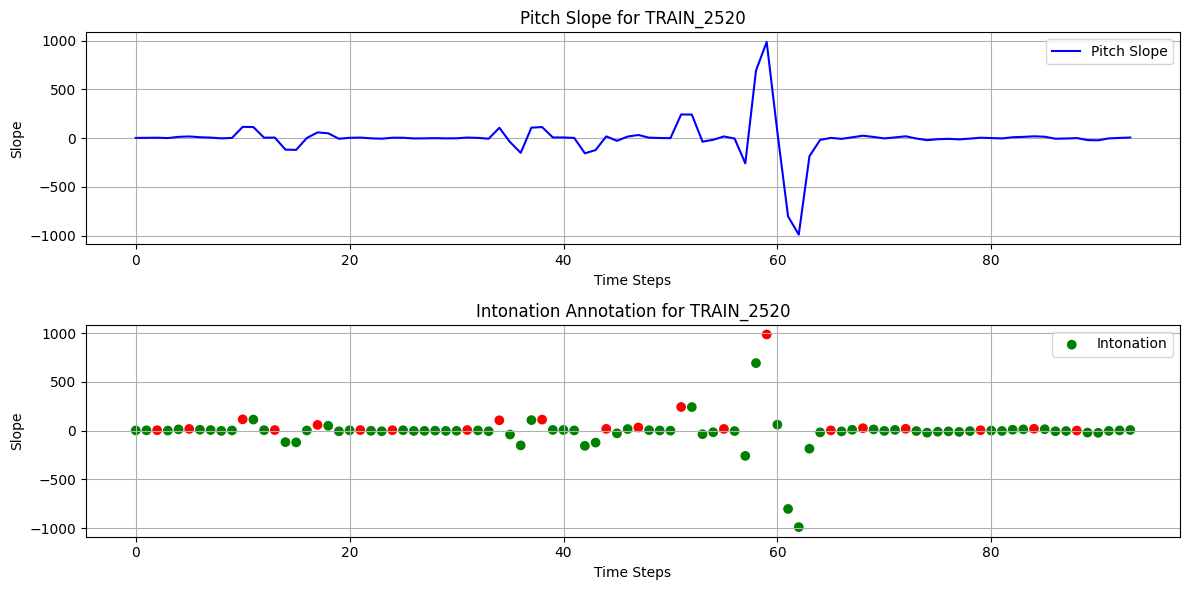

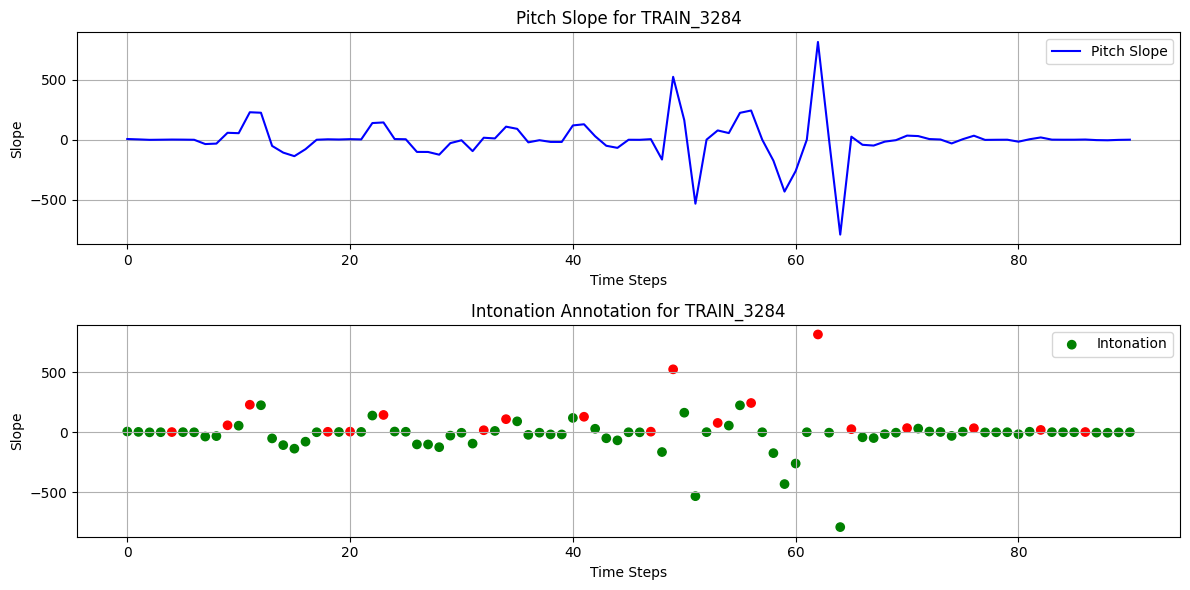

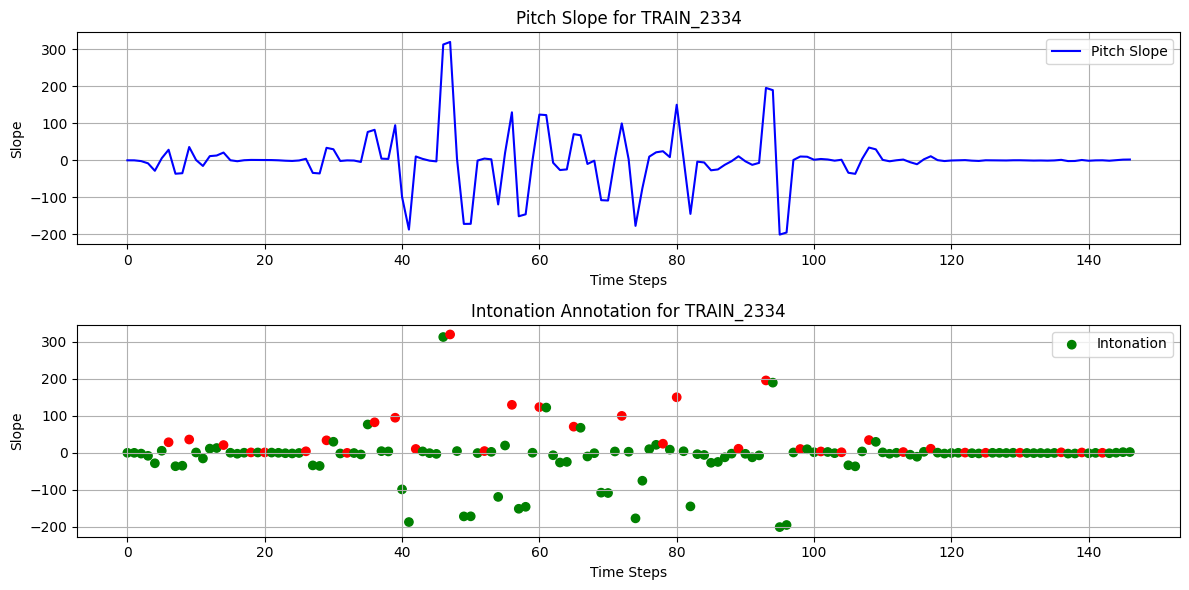

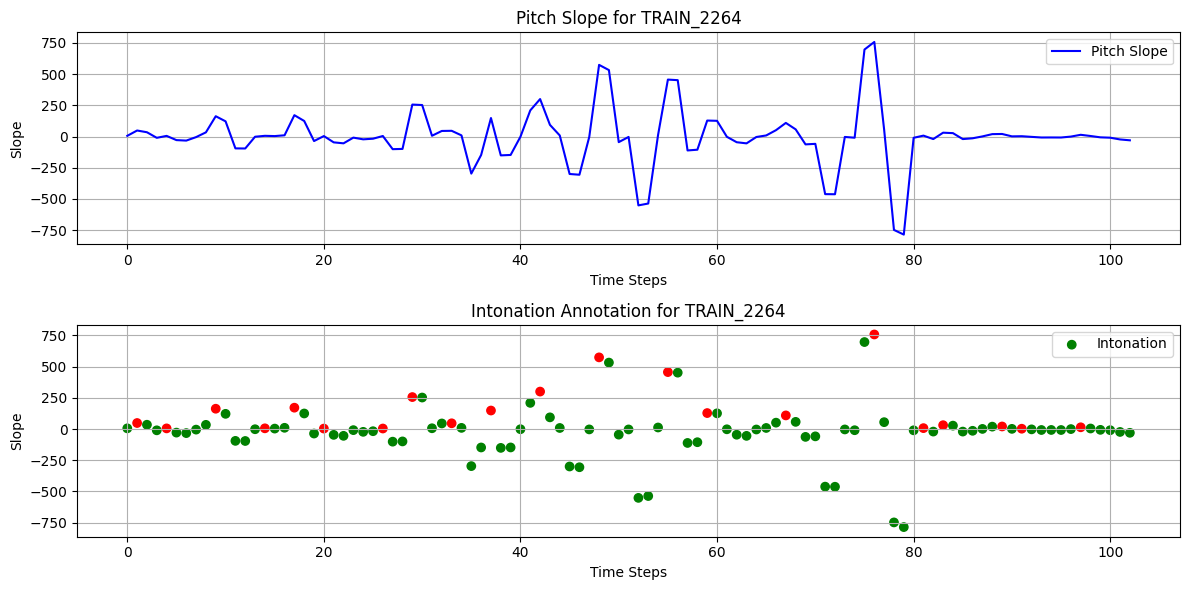

In [ ]:
import matplotlib.pyplot as plt
import random

# 샘플 5개 선택
sample_rows = df.sample(n=5, random_state=42)

# 시각화 함수 정의
def visualize_pitch_and_intonation(row):
    file_name = row['id']
    pitch_slope = row['pitch_slope']
    intonation_annotation = row['intonation_annotation']

    # 시간 축 생성
    time_steps = range(len(pitch_slope))

    # 시각화
    plt.figure(figsize=(12, 6))

    # pitch 기울기 플롯
    plt.subplot(2, 1, 1)
    plt.plot(time_steps, pitch_slope, label='Pitch Slope', color='blue')
    plt.title(f'Pitch Slope for {file_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Slope')
    plt.grid(True)
    plt.legend()

    # 억양 레이블링 플롯
    plt.subplot(2, 1, 2)
    plt.scatter(time_steps, pitch_slope, c=['red' if label == 'rising' else 'green' for label in intonation_annotation], label='Intonation')
    plt.title(f'Intonation Annotation for {file_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Slope')
    plt.grid(True)
    plt.legend()

    # 그래프 출력
    plt.tight_layout()
    plt.show()

# 샘플 데이터 시각화
for _, row in sample_rows.iterrows():
    visualize_pitch_and_intonation(row)
